# PROJECT  : Digital GREEN  CROP YIELD PROJECT

## Compiled by: Mashele G.P

## Project overview/Description


Smallholder farmers are crucial contributors to global food production, and in India often suffer most from poverty and malnutrition. These farmers face challenges such as limited access to modern agriculture, unpredictable weather, and resource constraints. To tackle this issue, Digital Green collected data via surveys, offering insights into farming practices, environmental conditions, and crop yields.

The objective of this challenge is to create a machine learning solution to predict the crop yield per acre of rice or wheat crops in India. Our goal is to empower these farmers and break the cycle of poverty and malnutrition.

A crop yield model could revolutionise Indian agriculture, and serve as a global model for smallholder farmers. Accurate yield predictions empower smallholder farmers to make informed planting and resource allocation decisions, reducing poverty and malnutrition and improving food security. As climate change intensifies, adaptive farming practices become crucial, making precise yield predictions even more valuable. Solutions developed here can drive sustainable agriculture and ensure a stable food supply for the world's growing population. This challenge offers data scientists and machine learning enthusiasts a unique chance to make a real difference in vulnerable populations' lives while advancing global food security in a concise, impactful way.

## Data Description

* District: Name of the district. <br>
* Block : 	Name of the block <br>
* CultLand	 : Area of total cultivated land <br>
* CropCultLand	 : Area of land under cultivation<br>
* LandPreparationMethod	 : Method for land preparation <br>
* CropTillageDate	 : Date of tillage of the largest plot <br>
* CropTillageDepth	: Depth of the tillage <br>
* CropEstMethod	 : Method of transplantation <br>
* RcNursEstDate	: Date of nursery establishment <br>
* SeedingSowingTransplanting	: Date of sowing/Transplanting the crop <br>
* SeedlingsPerPit	: Seedling planted per pit <br>
* NursDetFactor : 	What are the reason of choosing the date of nursery<br>
* TransDetFactor	: What are the reason for choosing the date of transplantation <br>
* TransplantingIrrigationHours :	Hours of irrigation during transplantation <br>
* TransplantingIrrigationSource	 : Source of water for irrigation during transplantation <br>
* TransplantingIrrigationPowerSource : 	Source of power for irrigation pump during transplantation <br>
* TransIrriCost	: Cost of irrigation during transplantation <br>
* StandingWater: 	How many days of standing water was there in the field <br>
* OrgFertilizers	: What organic fertilizer has the farmer used during transplantation <br>
* Ganaura	: Amount of organic fertilizer used (in Quintals) <br>
* CropOrgFYM	: Amount of FYM (Farm yard manure) organic fertilizer used (in Quintals) <br>
* PCropSolidOrgFertAppMethod	: Method of applying organic fertilizer in your previous crop during land preparation <br>
* NoFertilizerAppln	: Number of times chemical fertilizer has been applied in the entire crop cycle <br>
* CropbasalFerts	: Which type of chemical fertilizer has been applied during land preparation <br>
* BasalDAP	: Amount of DAP(in kgs)applied during land preparation <br>
* BasalUrea	: Amount of urea(in kgs) applied during land preparation <br>
* MineralFertAppMethod: 	Method of applying chemical fertilizer in your current crop during land preparation <br>
* FirstTopDressFert	: Which type of chemical fertilizer has been applied in the second dose <br>
* 1tdUrea	: Amount of urea (in kgs) applied in the second dose <br>
* 1appDaysUrea	: How many days after first dose was second dose of urea was given <br>
* 2tdUrea	: Amount of urea (in kgs) applied in the third dose <br>
* 2appDaysUrea	: How many days after second dose was third dose of urea was given <br>
* MineralFertAppMethod	: Method of applying chemical fertilizer in your current crop during second dose <br>
* Harv_method	: Method of harvesting <br>
* Harv_date	: Date of harvesting <br>
* Harv_hand_rent	: If labours were used or harvesting machine hired, what was the rent (in rupees) <br>
* Threshing_date	: Date of threshing of harvested crop <br>
* Threshing_method	: Method of threshing of harvested crop <br>
* Residue_length	: Length of the residue left after harvesting <br>
* Residue_perc	: Percentage of residue left in the field after harvesting <br>
* Stubble_use	: Management practice of the stubble after harvesting <br>
* Acre	: Area of land under cultivation in acres <br>
* Yield :	Yield of the current crop <br>

### Import the necessary libraries

In [3]:
# Lets install the lightgbm package
!pip install lightgbm

In [177]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To be used for categorical feature selection
from sklearn.feature_selection import chi2
# To oversample and undersample data
#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
import lightgbm as lgb
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Now lets read the train and test  dataset
train_data = pd.read_csv("Green_Train (5).csv")
test_data = pd.read_csv("Green_Test (4).csv")

In [7]:
# Print the first five rows of the  train dataset
train_data.head()  

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21            2.000   
1                 2022-07-20            2.000   
2                 2022-08-13            2.000   
3                 2022-07-17            2.000   
4                 2022-07-20            2.000   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         5.000                        Boring   
1                         5.000                        Boring   
2                         4.000                        Boring   
3                           NaN                           NaN   
4                         9.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric        200.000          2.000   
1                           Electric        125.000          3.000   
2                           Electric         80.000          2.000   
3                                NaN            NaN            NaN   
4                           Electric        300.000          2.000   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   
2    Ganaura FYM    1.000       1.000                SoilApplied   
3        Ganaura    1.000         NaN                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN     20.000         Broadcasting   
1                  2       DAP Urea    15.000     10.000         Broadcasting   
2                  2            DAP     4.000        NaN          SoilApplied   
3                  2       DAP Urea     6.000      3.000         Broadcasting   
4                  2       Urea DAP    15.000     30.000         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea   15.000        18.000      NaN           NaN   
1              U

In [8]:
# Print the last five rows of the training dataset
train_data.tail()

ID  District      Block  CultLand  CropCultLand  \
3865  ID_7ZZQ6R4XB4FK   Nalanda     Rajgir        28            28   
3866  ID_PVVDF6LK6FO8  Vaishali      Mahua         5             5   
3867  ID_RBYVUPRATVMW   Nalanda  Noorsarai        50            45   
3868  ID_ARE9QWENJNJ2     Jamui     Khaira        20            20   
3869  ID_KEPOQDTCZC6S     Jamui      Jamui         4             4   

                                  LandPreparationMethod CropTillageDate  \
3865  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-02   
3866  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-06   
3867                                      TractorPlough      2022-07-07   
3868                                      TractorPlough      2022-07-12   
3869                                      TractorPlough      2022-07-24   

      CropTillageDepth           CropEstMethod RcNursEstDate  \
3865                 6  LineSowingAfterTillage    2022-06-29   
3866                 5    Manual_PuddledRandom    2022-07-08   
3867                 5    Manual_PuddledRandom    2022-06-15   
3868                 3    Manual_PuddledRandom    2022-06-28   
3869                 4    Manual_PuddledRandom    2022-06-25   

     SeedingSowingTransplanting  SeedlingsPerPit  \
3865                 2022-07-16              NaN   
3866                 2022-07-30            1.000   
3867                 2022-07-08            1.000   
3868                 2022-07-24            4.000   
3869                 2022-07-28           10.000   

                                  NursDetFactor  \
3865                                        NaN   
3866  IrrigWaterAvailability LabourAvailability   
3867        CalendarDate IrrigWaterAvailability   
3868    SeedAvailability IrrigWaterAvailability   
3869   PreMonsoonShowers IrrigWaterAvailability   

                                      TransDetFactor  \
3865                                             NaN   
3866        IrrigWaterAvailability LaborAvailability   
3867             CalendarDate IrrigWaterAvailability   
3868  IrrigWaterAvailability RainArrival SeedlingAge   
3869                         SeedlingAge RainArrival   

      TransplantingIrrigationHours TransplantingIrrigationSource  \
3865                         7.000                        Boring   
3866                         3.000                        Boring   
3867                         6.000                        Boring   
3868                         2.000                         Canal   
3869                         5.000                        Boring   

     TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
3865                           Electric        360.000          5.000   
3866                             Diesel            NaN          3.000   
3867                           Electric        120.000          5.000   
3868                                NaN            NaN          9.000   
3869                           Electric        500.000          2.000   

     OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
3865        Ganaura    1.000         NaN                SoilApplied   
3866            NaN      NaN         NaN                        NaN   
3867        Ganaura    1.000         NaN               Broadcasting   
3868            NaN      NaN         NaN                        NaN   
3869            NaN      NaN         NaN                        NaN   

      NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea  \
3865                  2       DAP Urea    18.000     12.000   
3866                  3            DAP     6.000        NaN   
3867                  1           Urea       NaN     24.000   
3868                  1       DAP Urea     7.000     10.000   
3869                  2       DAP Urea    10.000     10.000   

     MineralFertAppMethod FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  \
3865         Broadcasting              Urea   12.000        45.000      

In [9]:
## Code to print the dimension of the training dataset
train_data.shape

(3870, 44)

In [10]:
print(f" The training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The training dataset consist of 3870 rows and 44 columns


In [111]:
# Display the datatypes in the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

### Observation


In [11]:
# Code to make a copy of the training dataset
data = train_data.copy()

In [12]:
### Select the date columns
object_col =data.select_dtypes("object").columns

In [13]:
# list of date columns
date_col=['CropTillageDate','RcNursEstDate','SeedingSowingTransplanting','Harv_date', 'Threshing_date']

In [14]:
### Convert  date  object format to datetime format
for item in date_col:
        data[item] = pd.to_datetime(data[item])
        

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  3870 non-null   object        
 1   District                            3870 non-null   object        
 2   Block                               3870 non-null   object        
 3   CultLand                            3870 non-null   int64         
 4   CropCultLand                        3870 non-null   int64         
 5   LandPreparationMethod               3870 non-null   object        
 6   CropTillageDate                     3870 non-null   datetime64[ns]
 7   CropTillageDepth                    3870 non-null   int64         
 8   CropEstMethod                       3870 non-null   object        
 9   RcNursEstDate                       3787 non-null   datetime64[ns]
 10  SeedingSowingTransplanti

In [16]:
### Create the growth duration column
data["growth_duration"] = (data["Harv_date"]-data['SeedingSowingTransplanting'])
### Create the nursery duration columndata['RcNursEstDate']
data["nursery_duration"] = (data['SeedingSowingTransplanting']-data['RcNursEstDate'])
### Create the tillage duration column
data["tillage_duration"] = (data['SeedingSowingTransplanting']-data['CropTillageDate'])

In [17]:
### Create the growth duration column
data["growth_duration"] = data["growth_duration"].astype(str).str.replace("days","")
### Create the nursery duration columndata['RcNursEstDate']
data["nursery_duration"] = data["nursery_duration"].astype(str).str.replace("days","")
### Create the tillage duration column
data["tillage_duration"] = data["tillage_duration"].astype(str).str.replace("days","")

In [18]:
### Now lets change the string columns to integer data type
data["growth_duration"]= data["growth_duration"].astype(int)
data["nursery_duration"] = data["nursery_duration"].astype(str).str.replace('NaT',"0")
data["tillage_duration"]= data["tillage_duration"].astype(int)

In [19]:
# Convert the nursery duration column to an integer datatype
data["nursery_duration"]=data["nursery_duration"].astype(int)

In [21]:
### Now the drop the dates columns
data = data.drop(columns=date_col,axis=1)

In [22]:
## Code to print the first five rows of the testing dataset
test_data.head()

ID  District   Block  CultLand  CropCultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira        20            13   
1  ID_SO3VW2X4QO93     Jamui  Khaira        25            25   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir        30            30   
3  ID_QUISMWEZR2H4  Vaishali   Mahua        15            10   
4  ID_25JGI455VKCZ   Nalanda  Rajgir        30            10   

                               LandPreparationMethod CropTillageDate  \
0                                      TractorPlough      2022-07-24   
1                                      TractorPlough      2022-07-24   
2  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-07   
3  WetTillagePuddling TractorPlough BullockPlough...      2022-07-04   
4  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-21   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 4    Manual_PuddledLine    2022-07-03   
1                 5  Manual_PuddledRandom    2022-07-08   
2                 5  Manual_PuddledRandom    2022-06-24   
3                 5  Manual_PuddledRandom    2022-06-20   
4                 3  Manual_PuddledRandom    2022-06-24   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-29            1.000   
1                 2022-08-02            4.000   
2                 2022-07-08            2.000   
3                 2022-07-10            2.000   
4                 2022-07-22            1.000   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         2.000                        Boring   
1                         2.000                         Canal   
2                         4.000                         Canal   
3                         2.000                        Boring   
4                         6.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel        200.000          2.000   
1                                NaN            NaN          3.000   
2                                NaN            NaN         10.000   
3                             Diesel            NaN            NaN   
4                           Electric        400.000            NaN   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            FYM      NaN       2.000                SoilApplied   
1            NaN      NaN         NaN                        NaN   
2        Ganaura    2.000         NaN               Broadcasting   
3            FYM      NaN       5.000                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  3            DAP     6.000        NaN         Broadcasting   
1                  3            DAP     5.000        NaN         Broadcasting   
2                  2       DAP Urea     9.000     18.000         Broadcasting   
3                  2            DAP    15.000        NaN          SoilApplied   
4                  2       DAP Urea    20.000     15.000         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea    8.000        23.000    6.000        63.000   
1              Urea    7.000

In [23]:
### Code to print the dimension of the testing dataset
test_data.shape

(1290, 43)

### Observation
* The testing dataset consist of 1290 rows and 43 columns.

In [24]:
# Code to display the dataset data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1290 non-null   object 
 1   District                            1290 non-null   object 
 2   Block                               1290 non-null   object 
 3   CultLand                            1290 non-null   int64  
 4   CropCultLand                        1290 non-null   int64  
 5   LandPreparationMethod               1290 non-null   object 
 6   CropTillageDate                     1290 non-null   object 
 7   CropTillageDepth                    1290 non-null   int64  
 8   CropEstMethod                       1290 non-null   object 
 9   RcNursEstDate                       1247 non-null   object 
 10  SeedingSowingTransplanting          1290 non-null   object 
 11  SeedlingsPerPit                     1187 no

In [25]:
### Convert the dates to date format
for variable in date_col:
     test_data[variable] = pd.to_datetime(test_data[variable])

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  1290 non-null   object        
 1   District                            1290 non-null   object        
 2   Block                               1290 non-null   object        
 3   CultLand                            1290 non-null   int64         
 4   CropCultLand                        1290 non-null   int64         
 5   LandPreparationMethod               1290 non-null   object        
 6   CropTillageDate                     1290 non-null   datetime64[ns]
 7   CropTillageDepth                    1290 non-null   int64         
 8   CropEstMethod                       1290 non-null   object        
 9   RcNursEstDate                       1247 non-null   datetime64[ns]
 10  SeedingSowingTransplanti

In [27]:
### Create the growth duration column
test_data["growth_duration"] = (test_data["Harv_date"]-test_data['SeedingSowingTransplanting'])
### Create the nursery duration columndata['RcNursEstDate']
test_data["nursery_duration"] = (test_data['SeedingSowingTransplanting']-test_data['RcNursEstDate'])
### Create the tillage duration column
test_data["tillage_duration"] = (test_data['SeedingSowingTransplanting']-test_data['CropTillageDate'])

In [28]:
### Create the growth duration column
test_data["growth_duration"] = test_data["growth_duration"].astype(str).str.replace("days","")
### Create the nursery duration columndata['RcNursEstDate']
test_data["nursery_duration"] = test_data["nursery_duration"].astype(str).str.replace("days","")
### Create the tillage duration column
test_data["tillage_duration"] = test_data["tillage_duration"].astype(str).str.replace("days","")

In [29]:
### Now lets change the string columns to integer data type
test_data["growth_duration"]= test_data["growth_duration"].astype(int)
test_data["nursery_duration"] = test_data["nursery_duration"].astype(str).str.replace('NaT',"0")
test_data["tillage_duration"]= test_data["tillage_duration"].astype(int)

In [30]:
test_data["nursery_duration"]=test_data["nursery_duration"].astype(int)

In [31]:
## Drop some columns in the testing dataset
test_data= test_data.drop(columns = ['CropTillageDate','RcNursEstDate','SeedingSowingTransplanting',
                        'Harv_date', 'Threshing_date'],axis=1)

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1290 non-null   object 
 1   District                            1290 non-null   object 
 2   Block                               1290 non-null   object 
 3   CultLand                            1290 non-null   int64  
 4   CropCultLand                        1290 non-null   int64  
 5   LandPreparationMethod               1290 non-null   object 
 6   CropTillageDepth                    1290 non-null   int64  
 7   CropEstMethod                       1290 non-null   object 
 8   SeedlingsPerPit                     1187 non-null   float64
 9   NursDetFactor                       1187 non-null   object 
 10  TransDetFactor                      1187 non-null   object 
 11  TransplantingIrrigationHours        1213 no

In [33]:
test_data.shape

(1290, 41)

In [34]:
data.shape

(3870, 42)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDepth                    3870 non-null   int64  
 7   CropEstMethod                       3870 non-null   object 
 8   SeedlingsPerPit                     3581 non-null   float64
 9   NursDetFactor                       3581 non-null   object 
 10  TransDetFactor                      3581 non-null   object 
 11  TransplantingIrrigationHours        3677 no

In [36]:
### Make a copy of the training dataset
green_data = data.copy()

In [37]:
### Now drop the ID columns
green_data = green_data.drop(columns="ID",axis=1)

In [38]:
 # Code to print the statistical summary of the numerical columns in the training dataset
green_data.describe().T  

count    mean      std      min     25%  \
CultLand                     3870.000  28.528   30.454    1.000  12.000   
CropCultLand                 3870.000  24.727   27.995    1.000  10.000   
CropTillageDepth             3870.000   4.488    1.133    1.000   4.000   
SeedlingsPerPit              3581.000   2.707    7.624    1.000   2.000   
TransplantingIrrigationHours 3677.000   8.018   42.612    1.000   2.000   
TransIrriCost                2988.000 379.727  419.725    1.000 150.000   
StandingWater                3632.000   3.248    2.207    1.000   2.000   
Ganaura                      1453.000  29.732  122.681    1.000   1.000   
CropOrgFYM                   1196.000  57.446  328.252    1.000   1.000   
NoFertilizerAppln            3870.000   2.184    0.635    1.000   2.000   
BasalDAP                     3327.000  11.452    8.422    1.000   6.000   
BasalUrea                    2166.000  13.352    9.702    1.000   7.000   
1tdUrea                      3314.000  11.514    8.716    1.000   6.000   
1appDaysUrea                 3314.000  29.200   12.139    1.000  23.000   
2tdUrea                      1176.000   7.375    5.933    1.000   4.000   
2appDaysUrea                 1170.000  58.765   11.357    1.000  58.000   
Harv_hand_rent               3618.000 536.622 1138.614    1.000 150.000   
Residue_length               3870.000  26.518    3.193    2.000  25.000   
Residue_perc                 3870.000  11.767    7.065   10.000  10.000   
Acre                         3870.000   0.293    0.207    0.045   0.156   
Yield                        3870.000 594.269  651.917    4.000 300.000   
growth_duration              3870.000 109.487   21.337 -244.000  97.000   
nursery_duration             3870.000  28.214    9.539    0.000  23.000   
tillage_duration             3870.000  14.320   14.587    1.000   3.000   

                                 50%     75%       max  
CultLand                      20.000  35.000   800.000  
CropCultLand                  20.000  30.000   800.000  
CropTillageDepth               4.000   5.000     8.000  
SeedlingsPerPit                2.000   3.000   442.000  
TransplantingIrrigationHours   4.000   6.000  2000.000  
TransIrriCost                250.000 450.000  6000.000  
StandingWater                  3.000   4.000    15.000  
Ganaura                        3.000   4.000  1400.000  
CropOrgFYM                     2.000   5.000  4000.000  
NoFertilizerAppln              2.000   3.000     4.000  
BasalDAP                      10.000  15.000   100.000  
BasalUrea                     10.000  16.000    90.000  
1tdUrea                       10.000  15.000    90.000  
1appDaysUrea                  28.000  36.000   332.000  
2tdUrea                        6.000  10.000    67.000  
2appDaysUrea                  60.000  65.000    97.000  
Harv_hand_rent               400.000 700.000 60000.000  
Residue_length                26.000  30.000    30.000  
Residue_perc                  10.000  10.000    40.000  
Acre                           0.227   0.370     2.188  
Yield                        425.000 740.000 16800.000  
growth_duration              110.000 123.000   241.000  
nursery_duration              27.000  34.000    68.000  
tillage_duration               7.000  26.000    73.000

In [39]:
# Code to check for missing values in the training dataset
green_data.isnull().sum()

District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDepth                         0
CropEstMethod                            0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilizerAppln                        0
CropbasalFerts                         188
BasalDAP                               543
BasalUrea                             1704
MineralFert

In [40]:
green_data.isnull().sum().sum()

20720

###  Observation:
* There are 20720 missing values in the training dataset.
* Data preprocessing will be done to handle missing values.

In [41]:
### Now compute the  percentage of missing values in each column
round((green_data.isnull().sum()/ green_data.shape[0])*100,)

District                              0.000
Block                                 0.000
CultLand                              0.000
CropCultLand                          0.000
LandPreparationMethod                 0.000
CropTillageDepth                      0.000
CropEstMethod                         0.000
SeedlingsPerPit                       7.000
NursDetFactor                         7.000
TransDetFactor                        7.000
TransplantingIrrigationHours          5.000
TransplantingIrrigationSource         3.000
TransplantingIrrigationPowerSource   13.000
TransIrriCost                        23.000
StandingWater                         6.000
OrgFertilizers                       34.000
Ganaura                              62.000
CropOrgFYM                           69.000
PCropSolidOrgFertAppMethod           35.000
NoFertilizerAppln                     0.000
CropbasalFerts                        5.000
BasalDAP                             14.000
BasalUrea                       

### Observation
* Some of the columns have missing values greater than 50%.
* We need to drop these three columns

In [42]:
# Code to check for duplicates in the dataset
green_data.duplicated().sum()

0

In [43]:
test_data.duplicated().sum()

0

# Exploratory data analysis(EDA)

## Univariate data analysis

### Numerical data

In [44]:
# Code to select the numerical columns from the training dataset
numerical_columns =green_data.select_dtypes("number").columns

In [45]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))                    # increase the size of the plot
    plt.title(f"Histogram for {item}")           # Give the graph a title
    plt.xlabel(item)                            # set the label on the x-axis
    plt.ylabel("frequency")                     # set the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))                     # increase the size of the plot
    plt.title(f"Boxplot for {item}")               # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);   # Boxplot for numerical dataset
    plt.xlabel(item)                               # set the label on the x-axis
    plt.show()

In [46]:
numerical_columns

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea',
       '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'Yield', 'growth_duration',
       'nursery_duration', 'tillage_duration'],
      dtype='object')

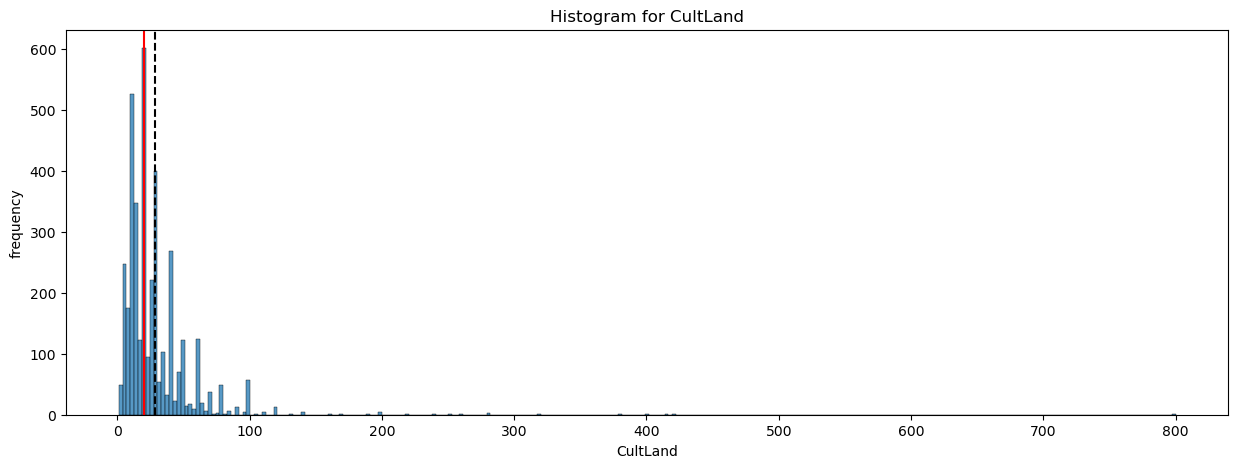

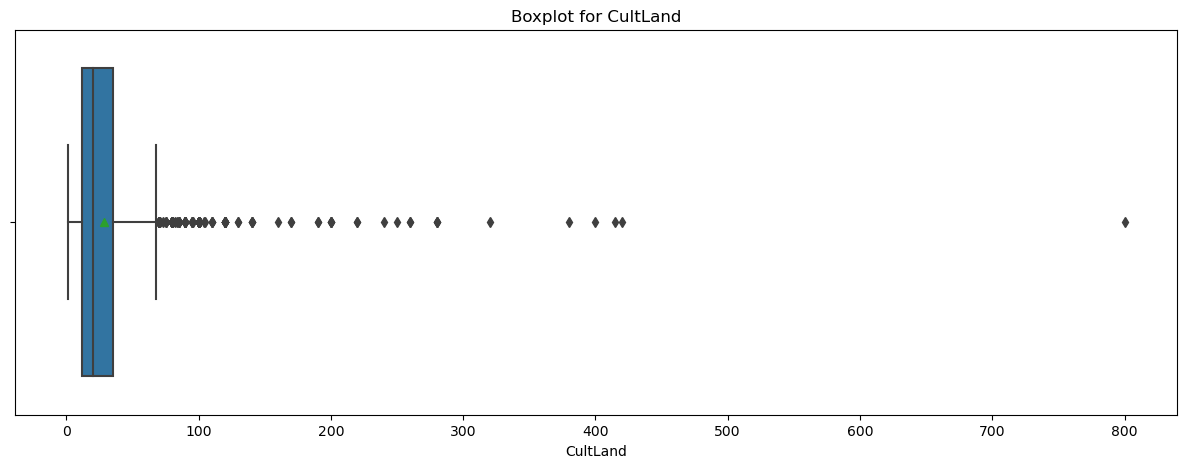

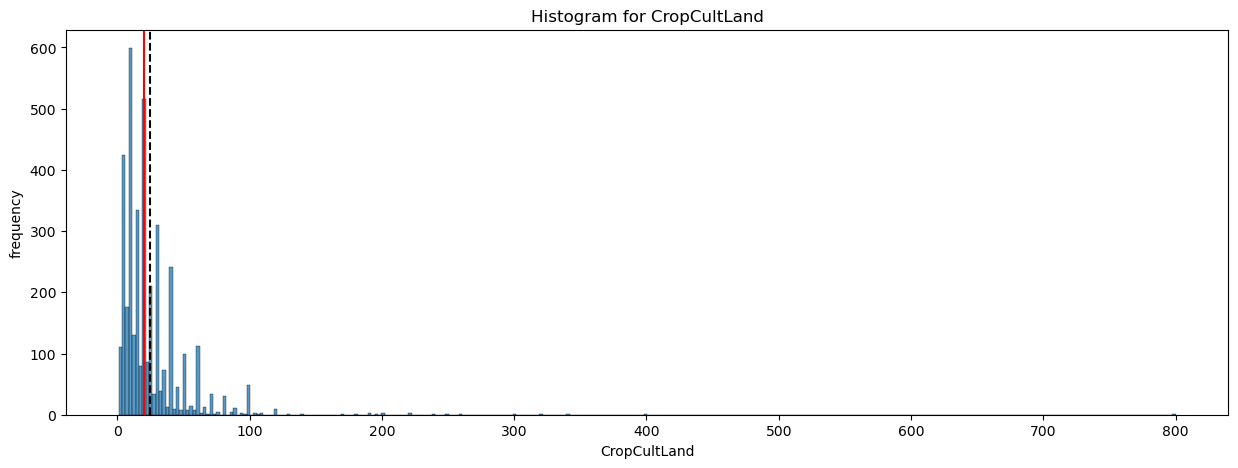

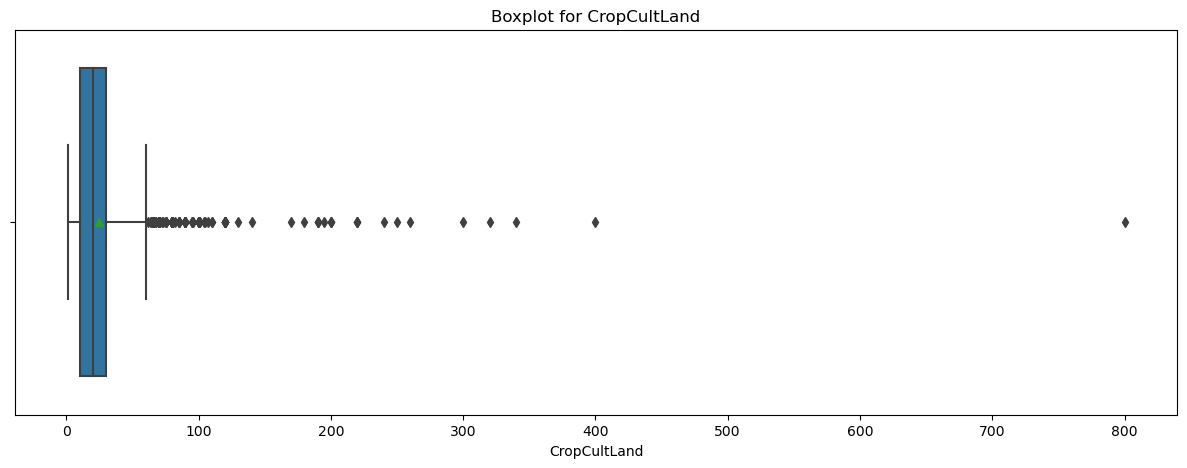

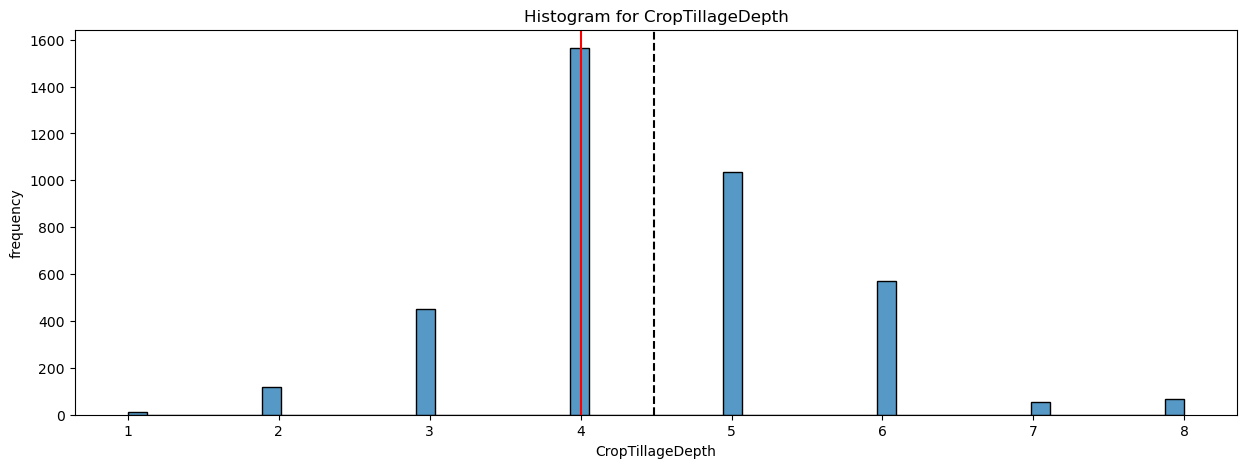

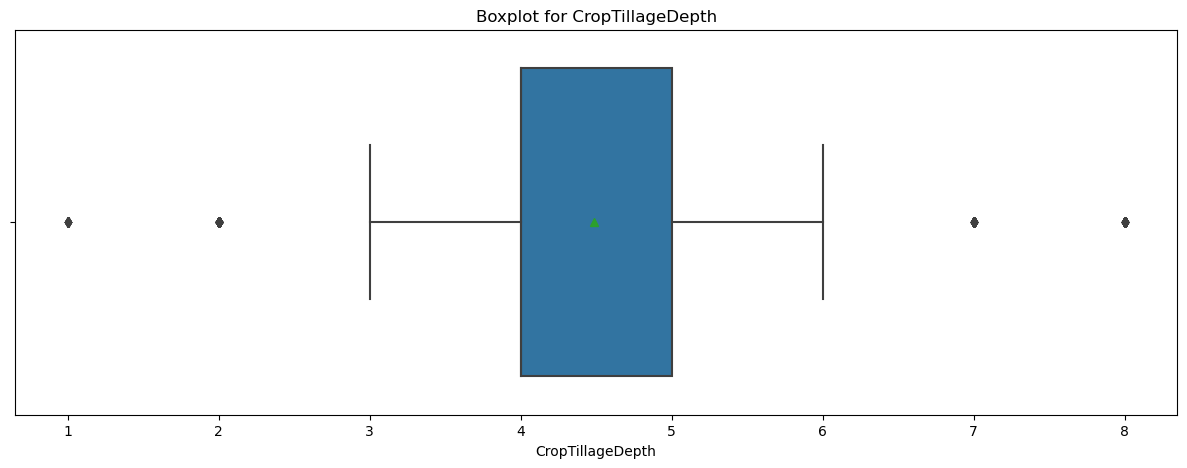

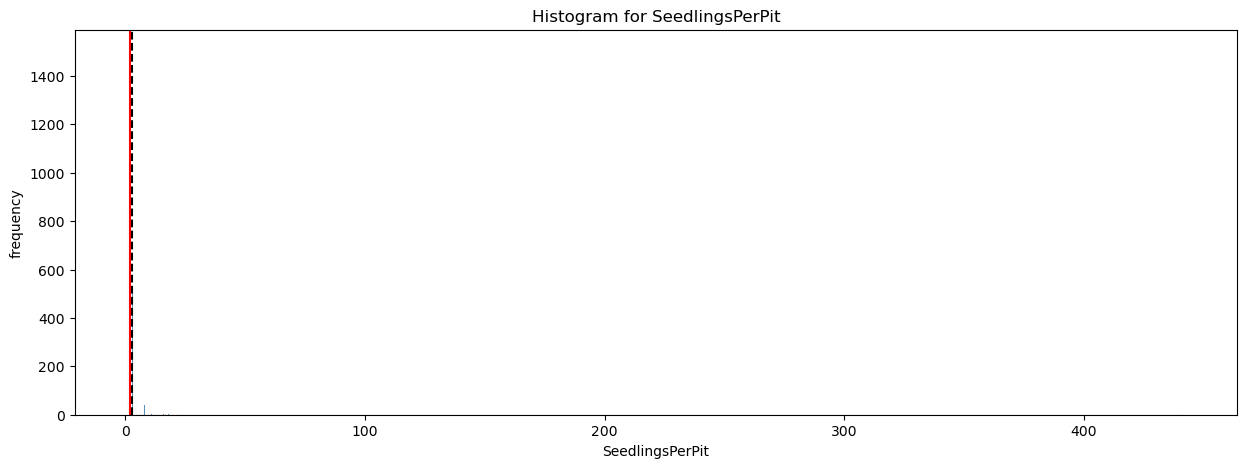

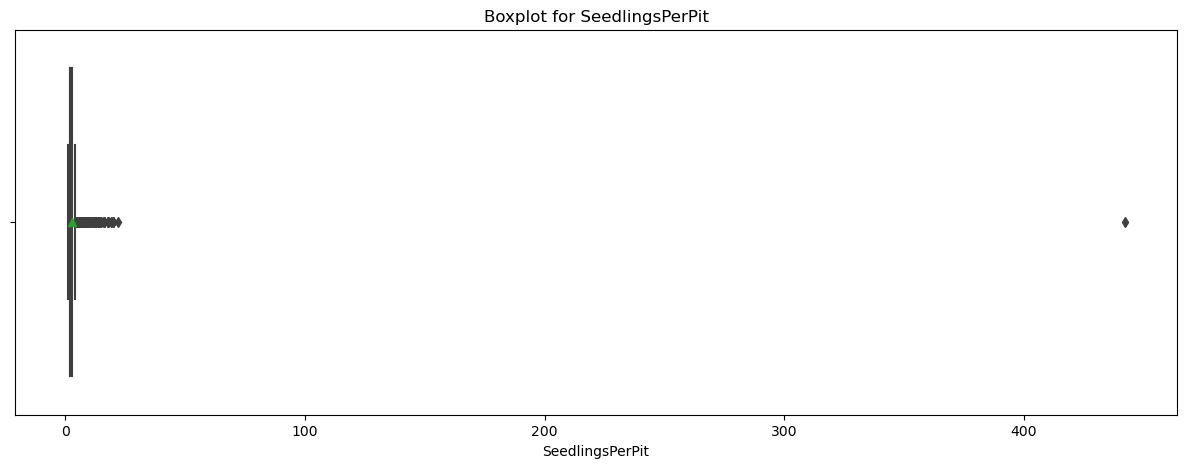

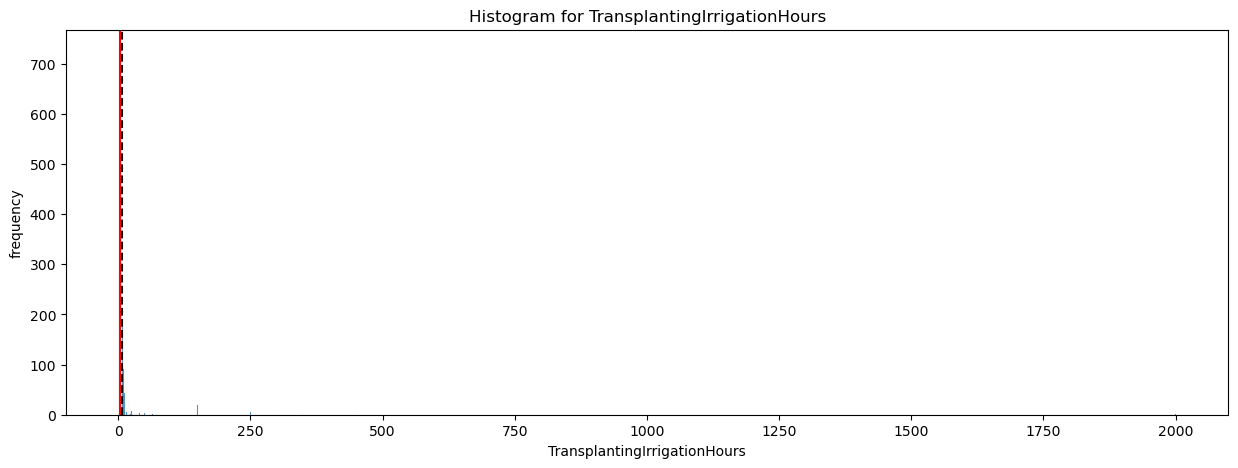

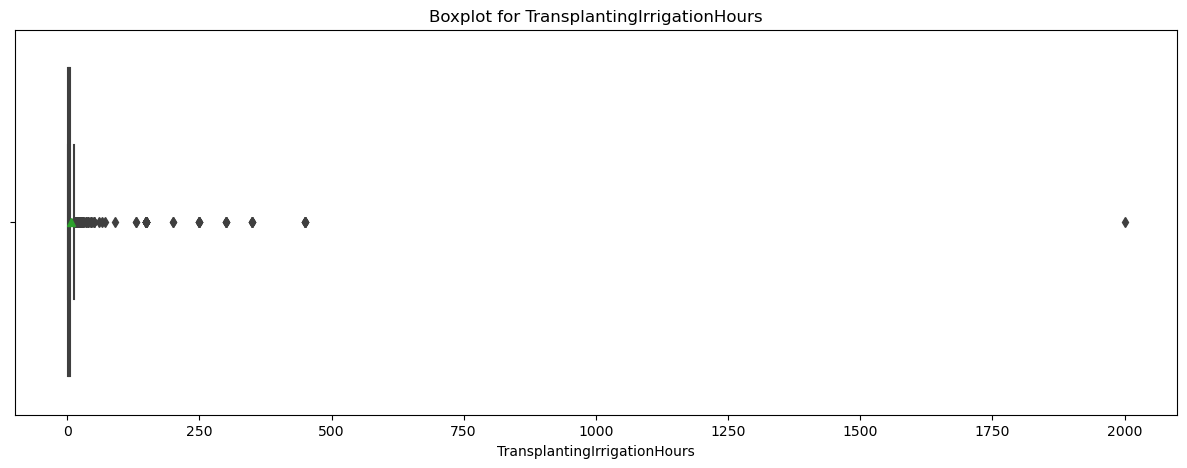

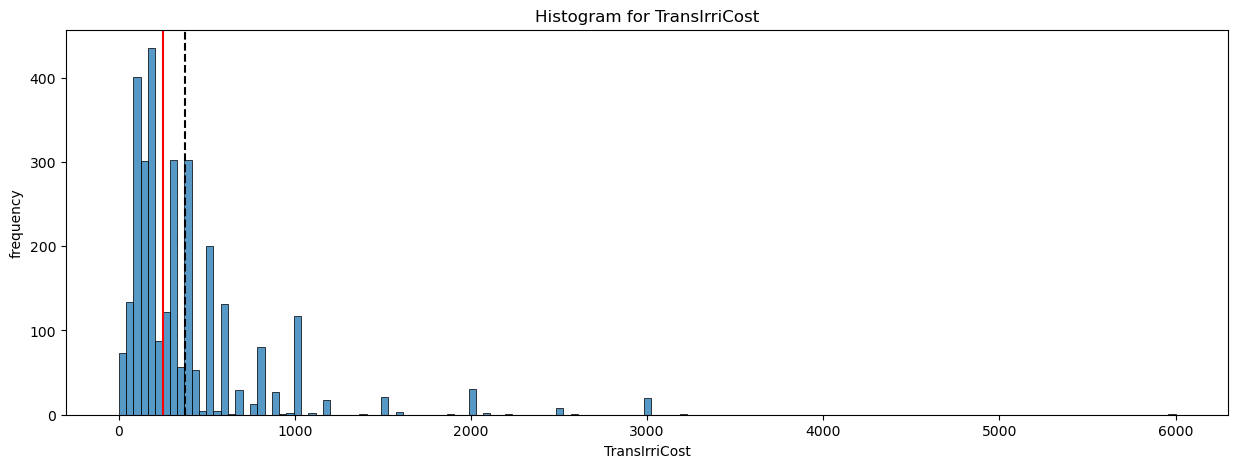

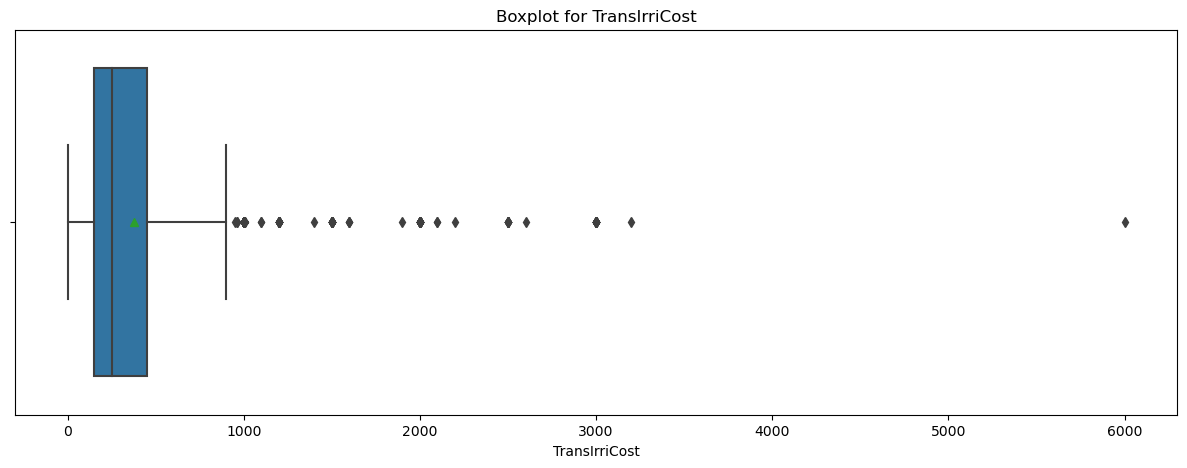

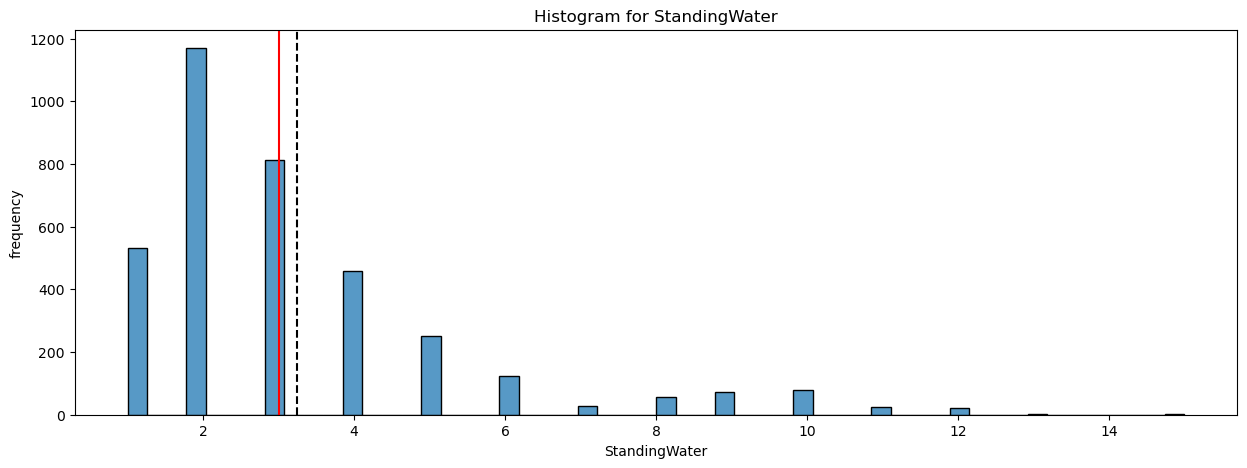

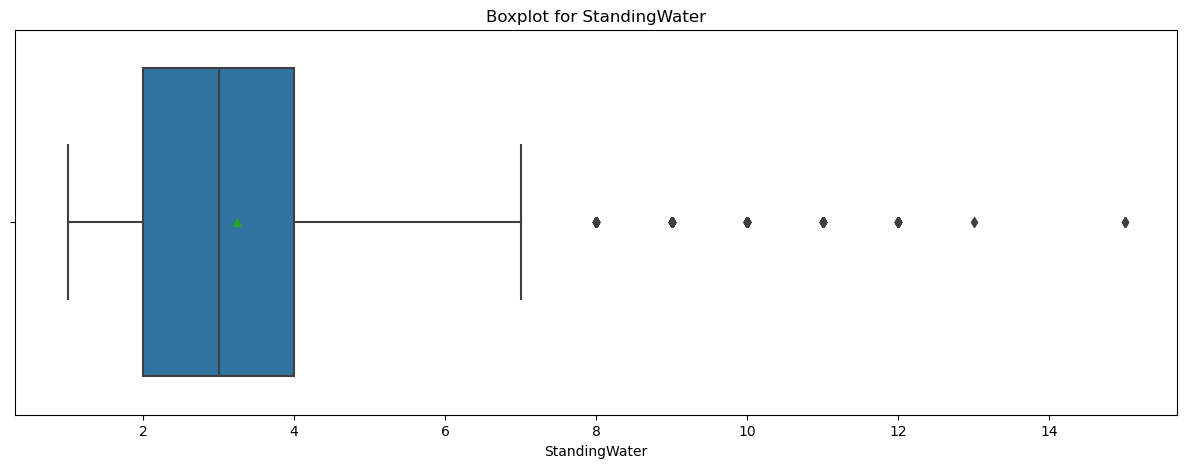

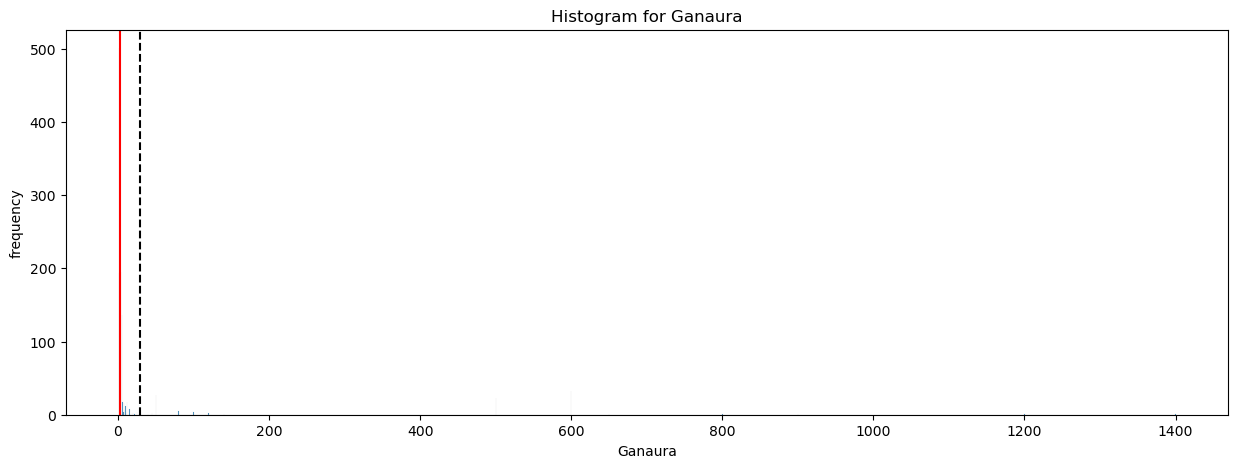

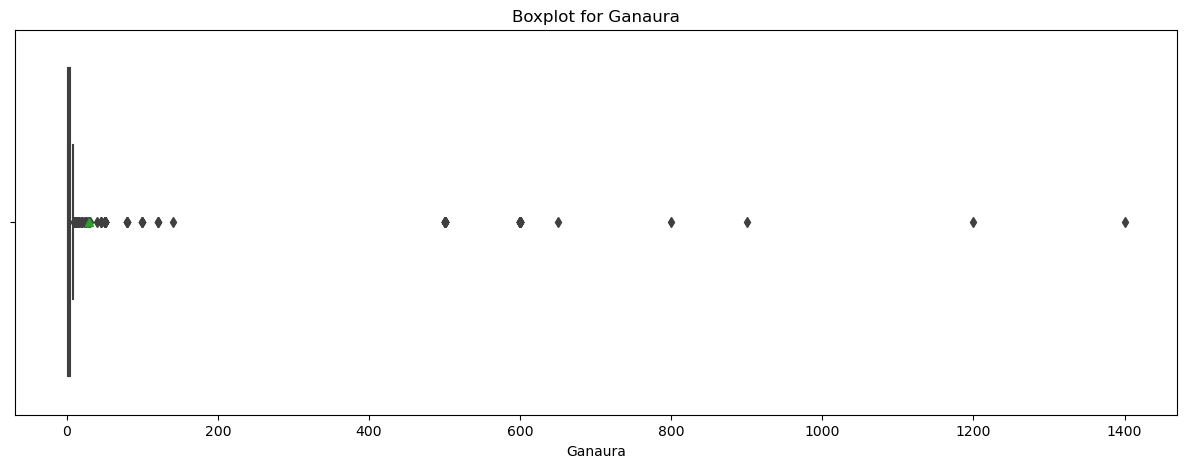

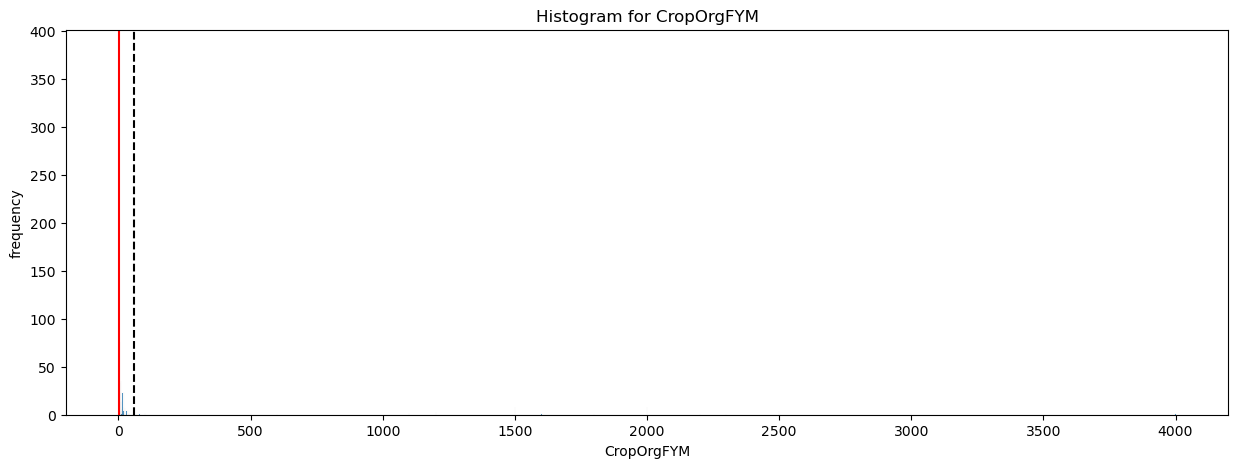

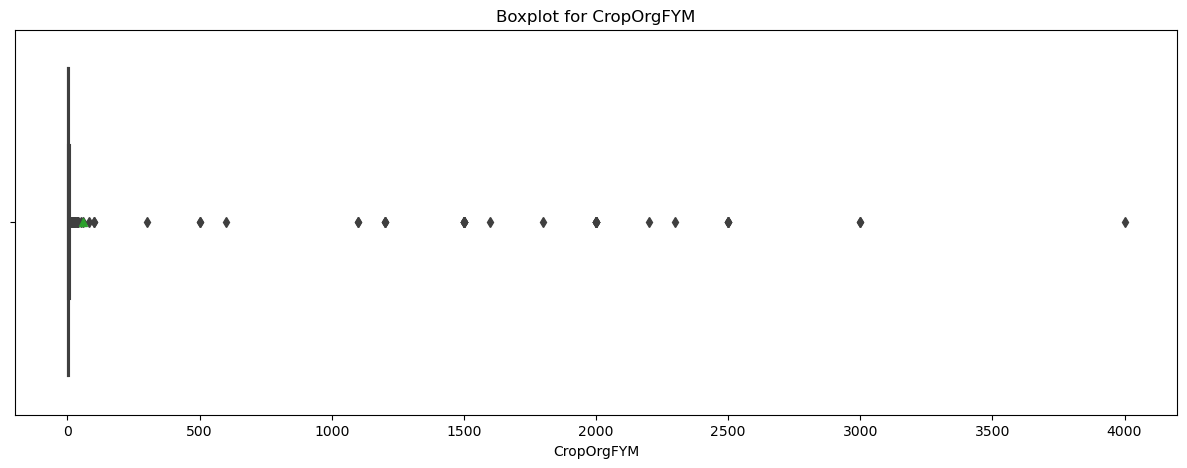

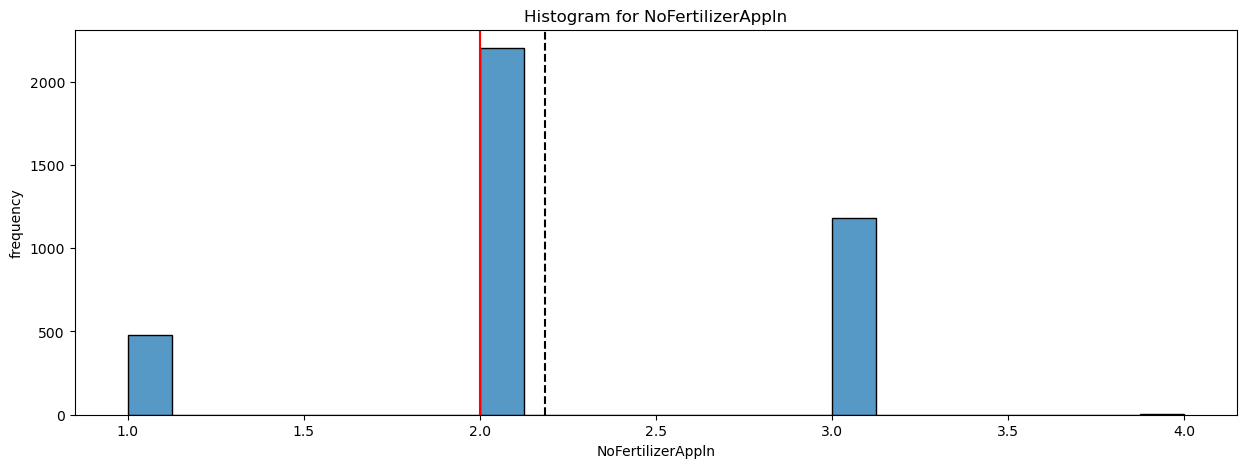

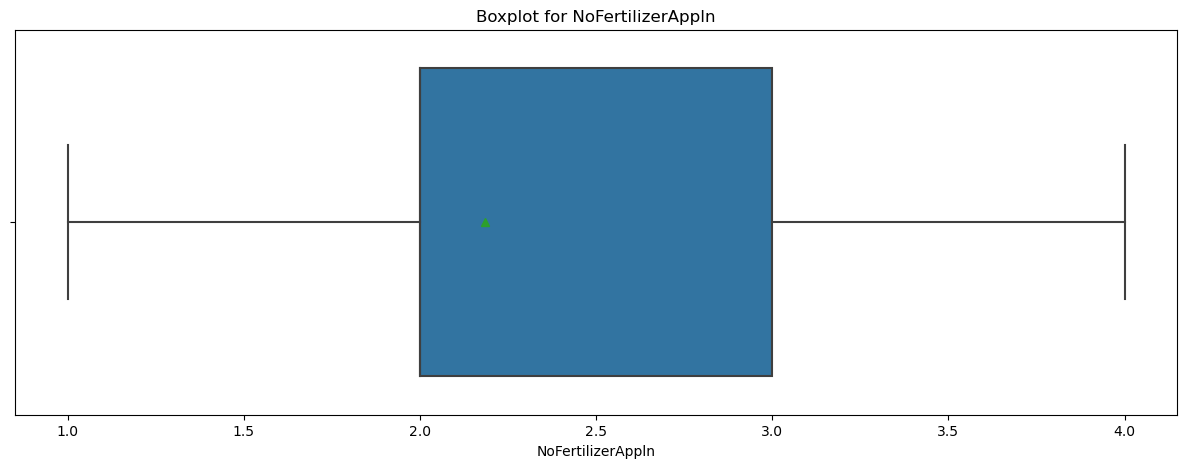

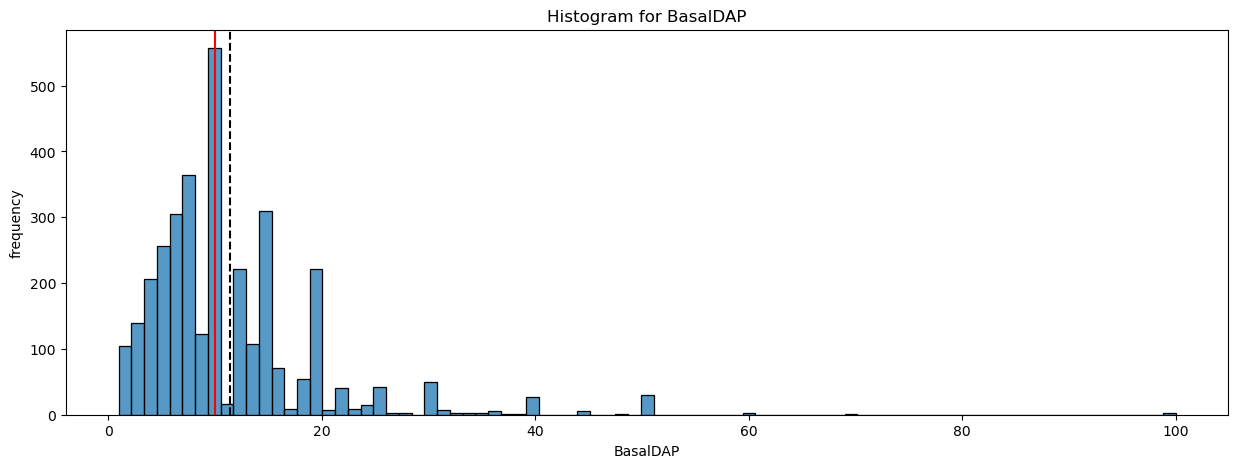

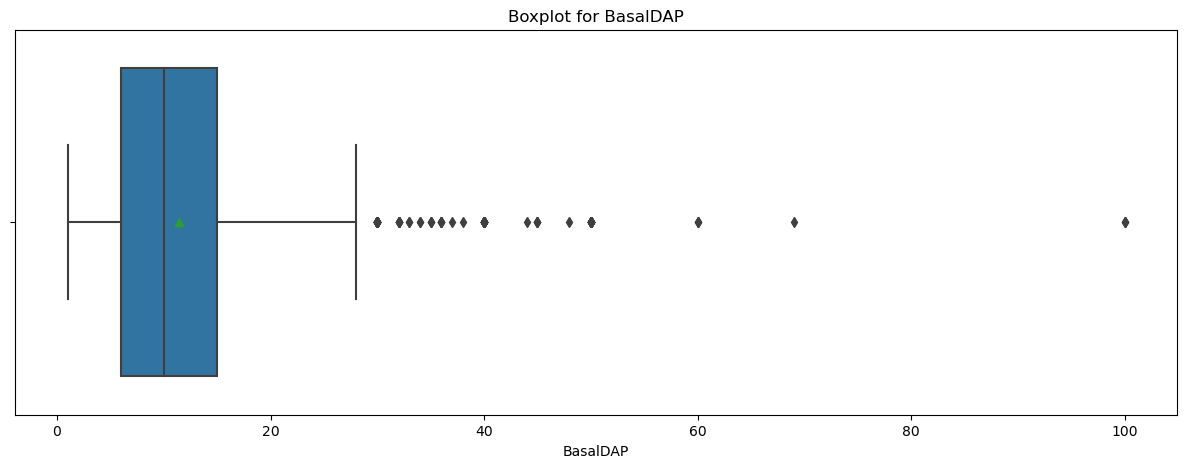

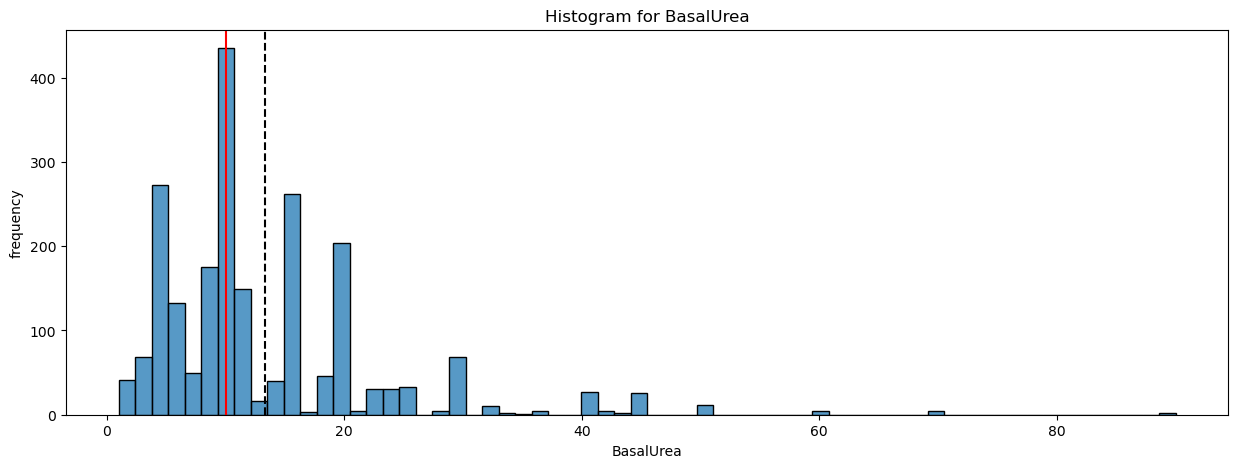

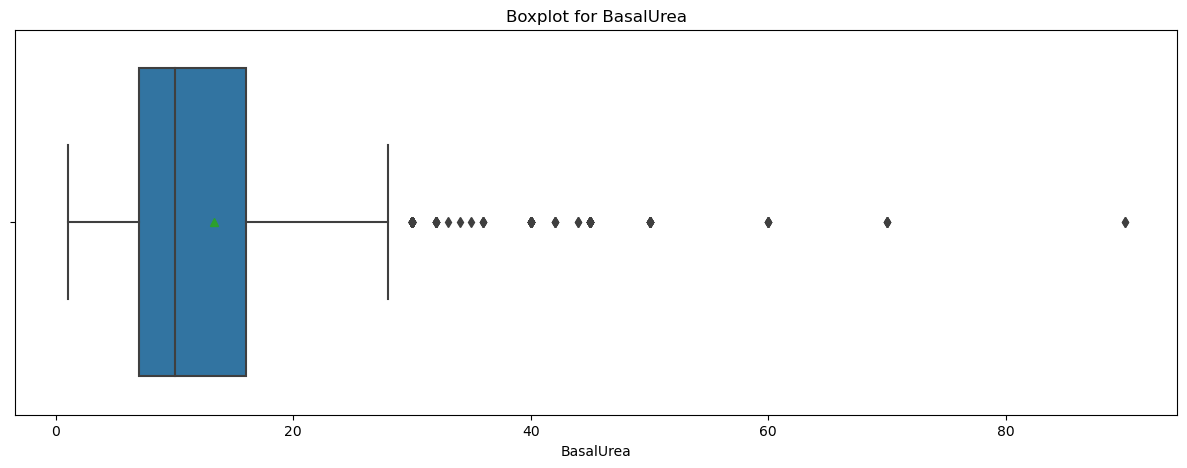

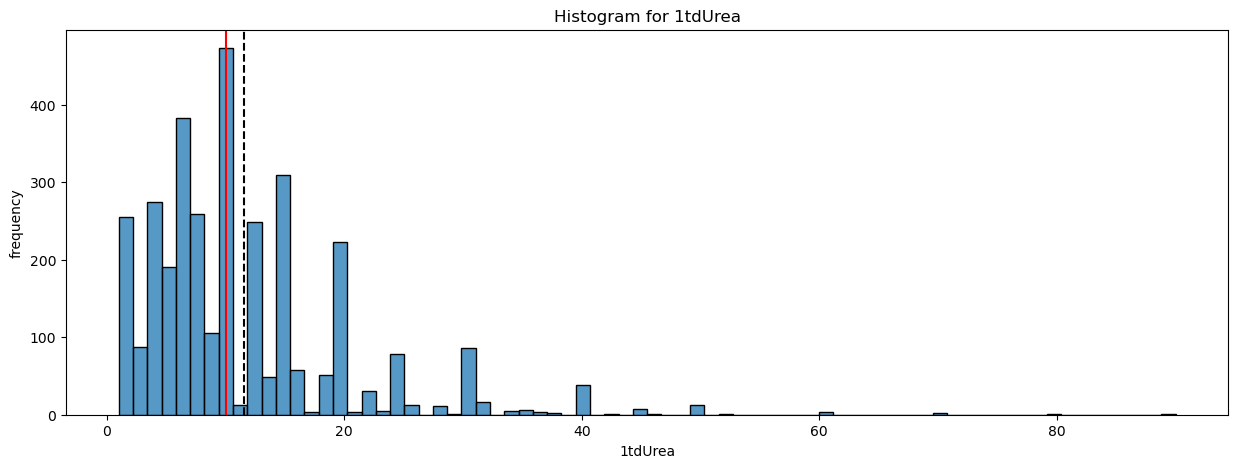

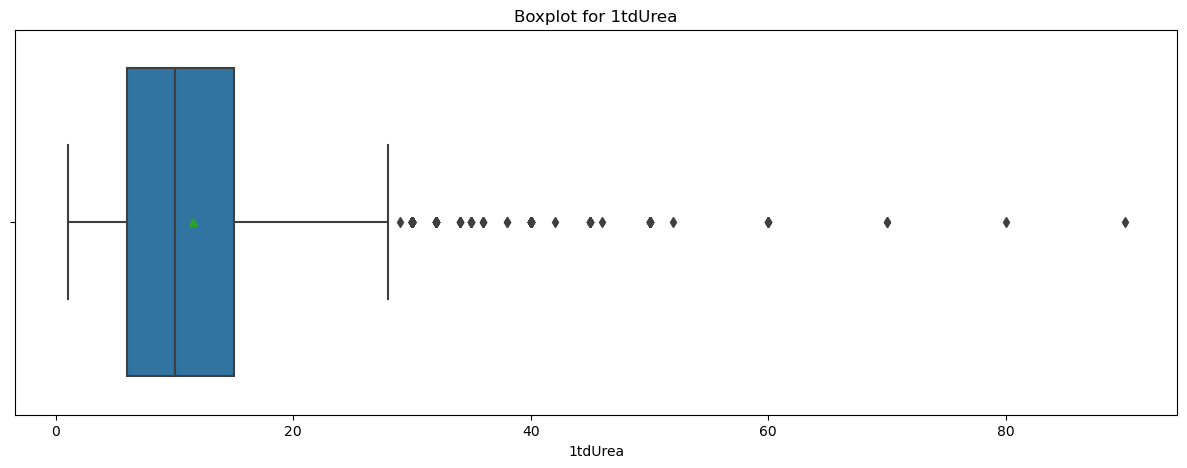

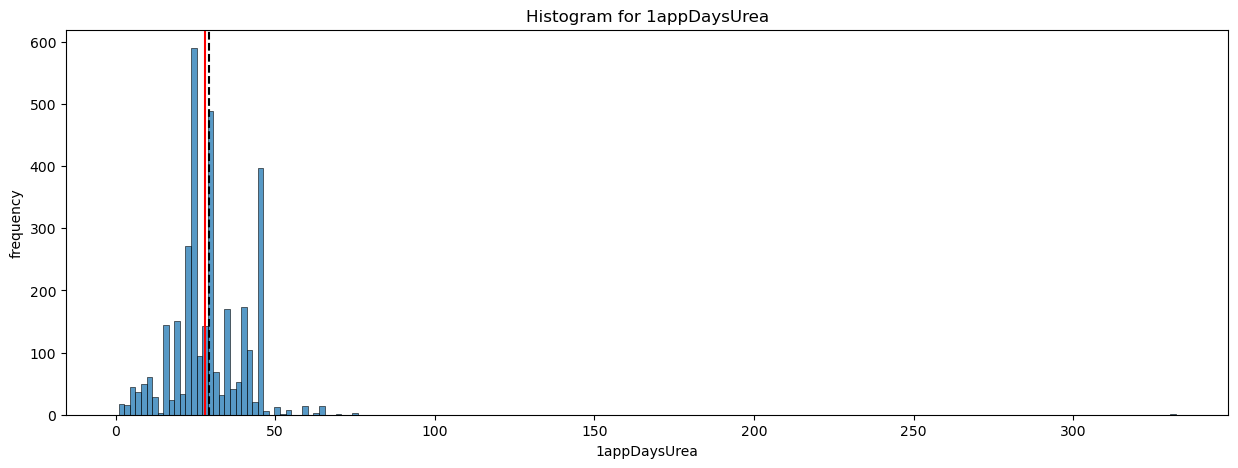

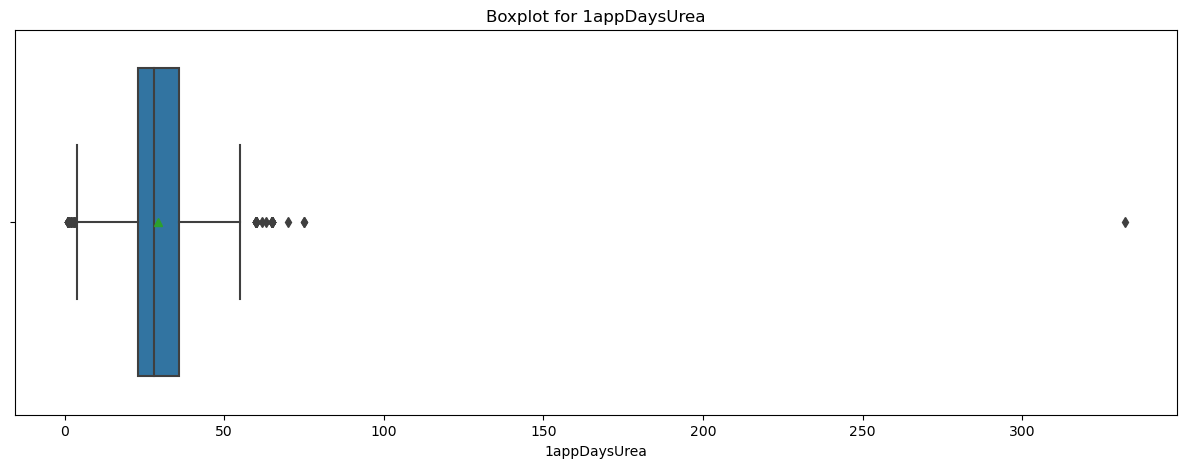

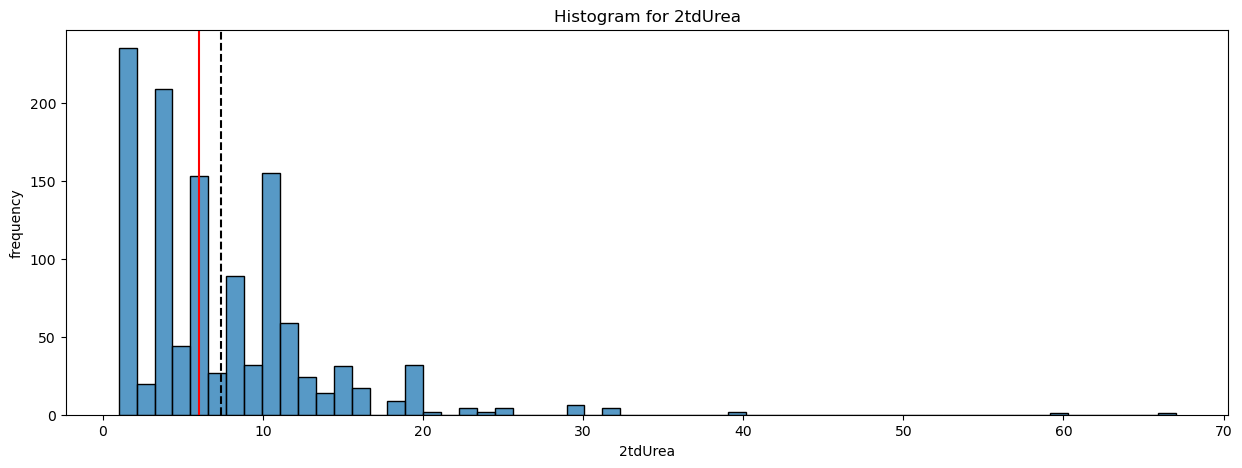

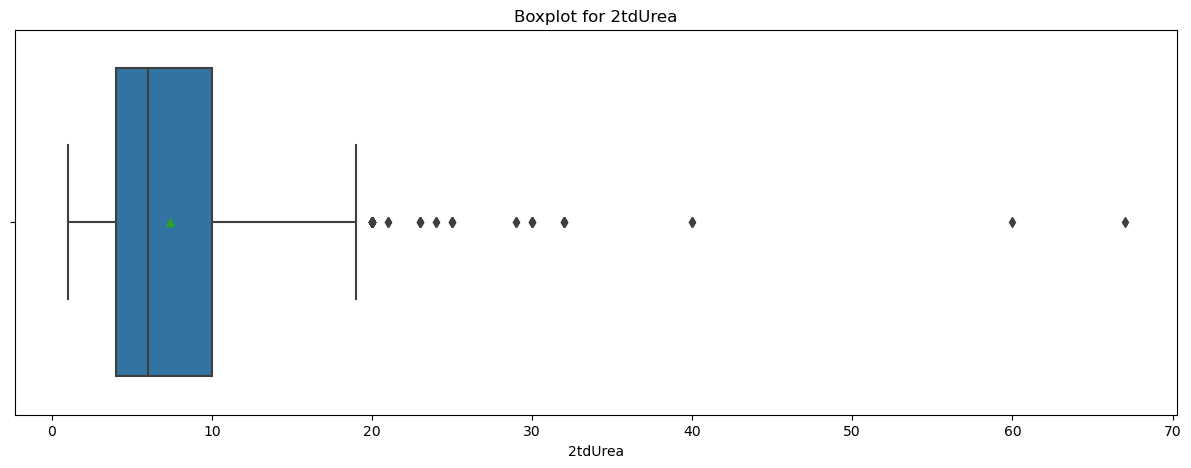

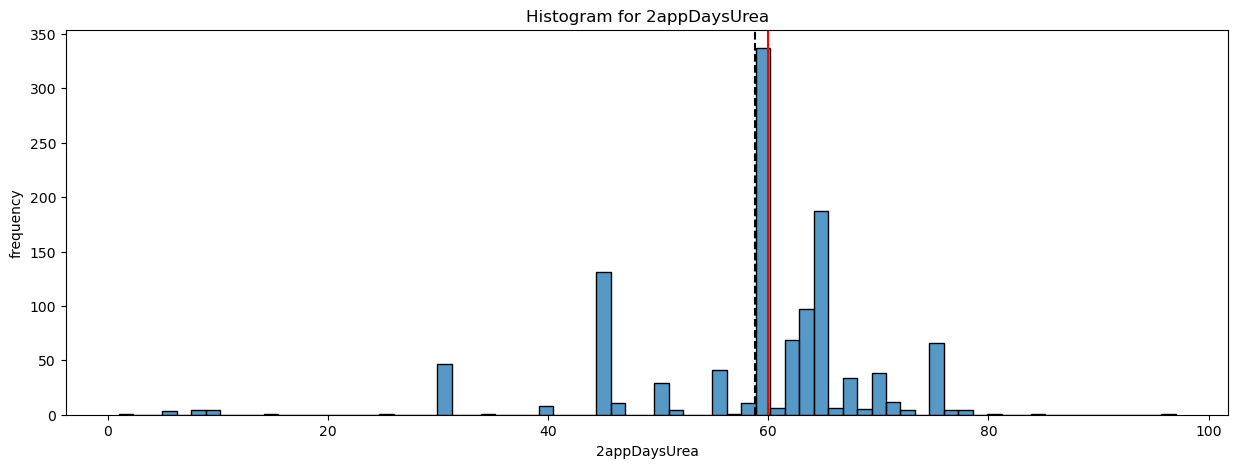

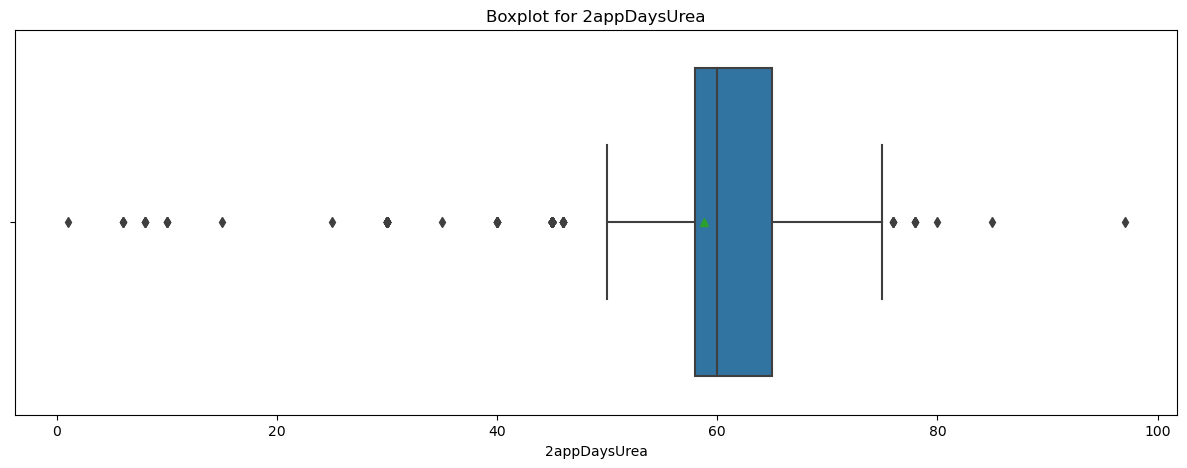

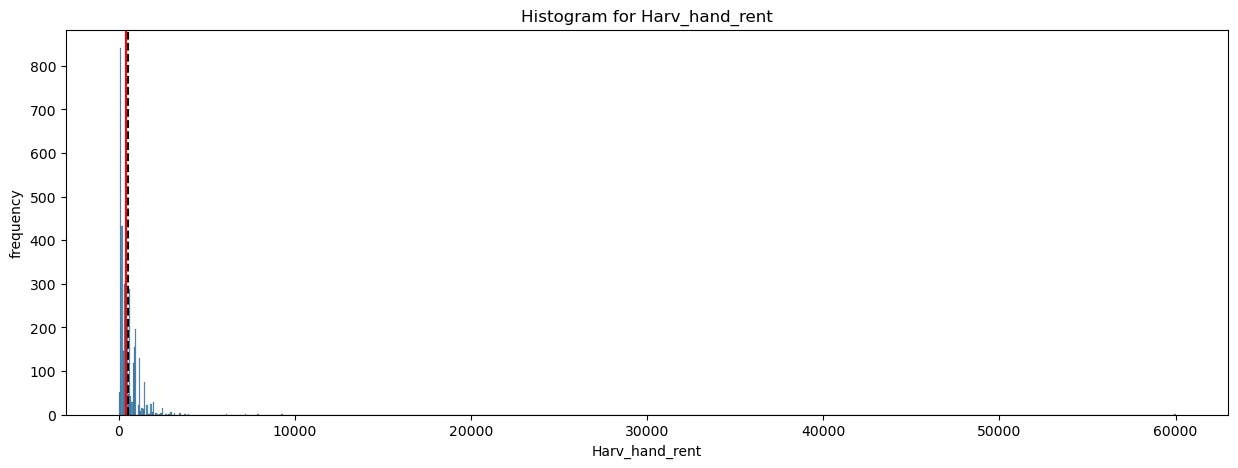

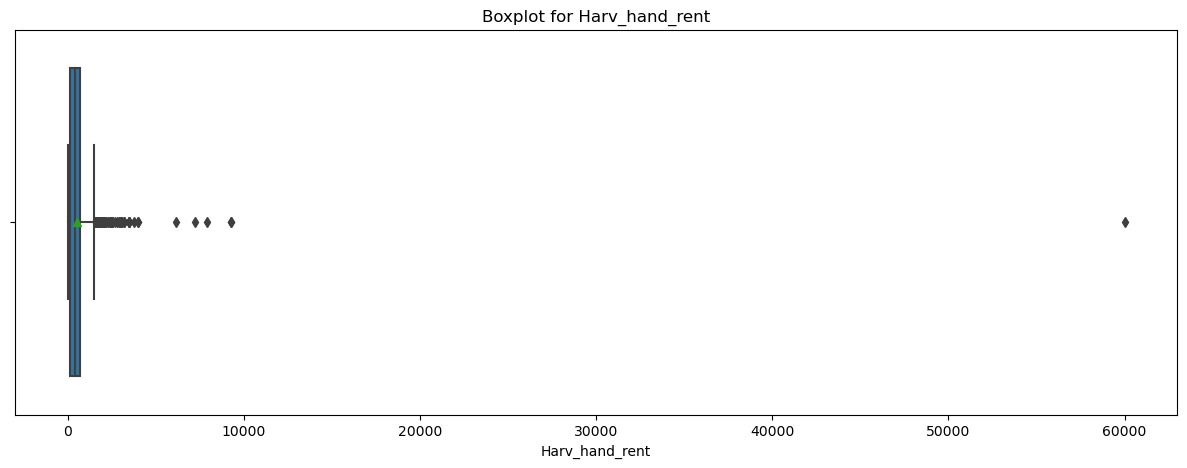

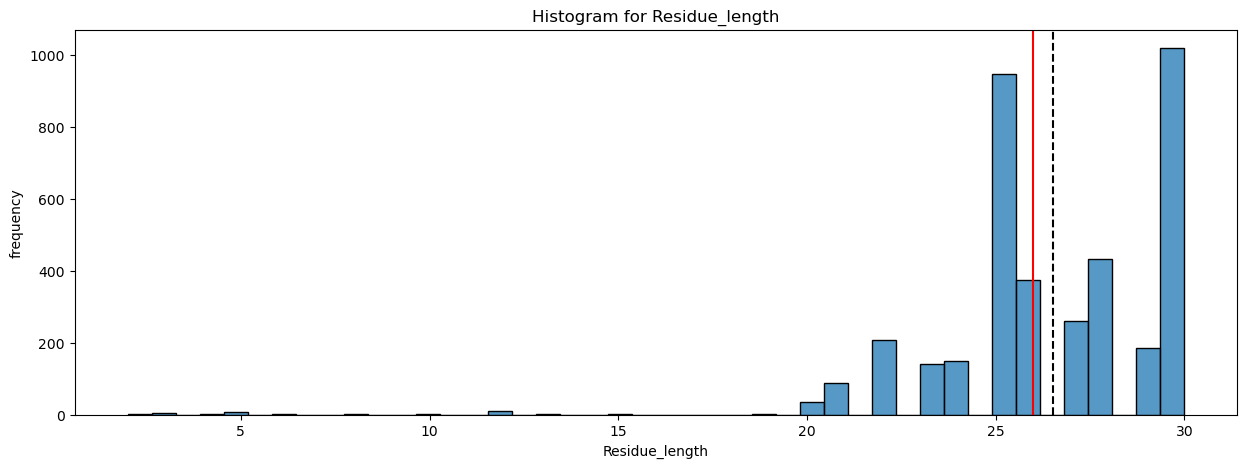

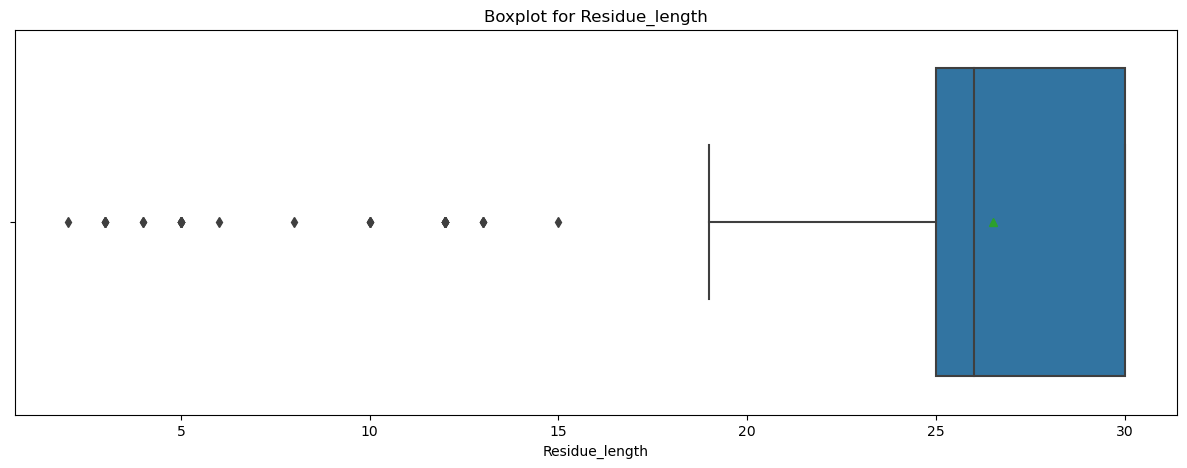

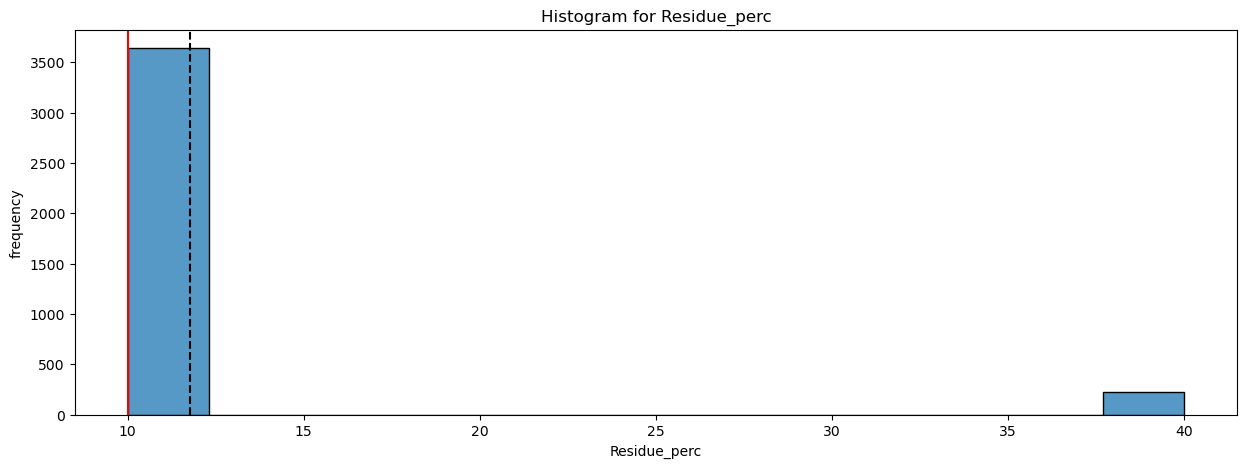

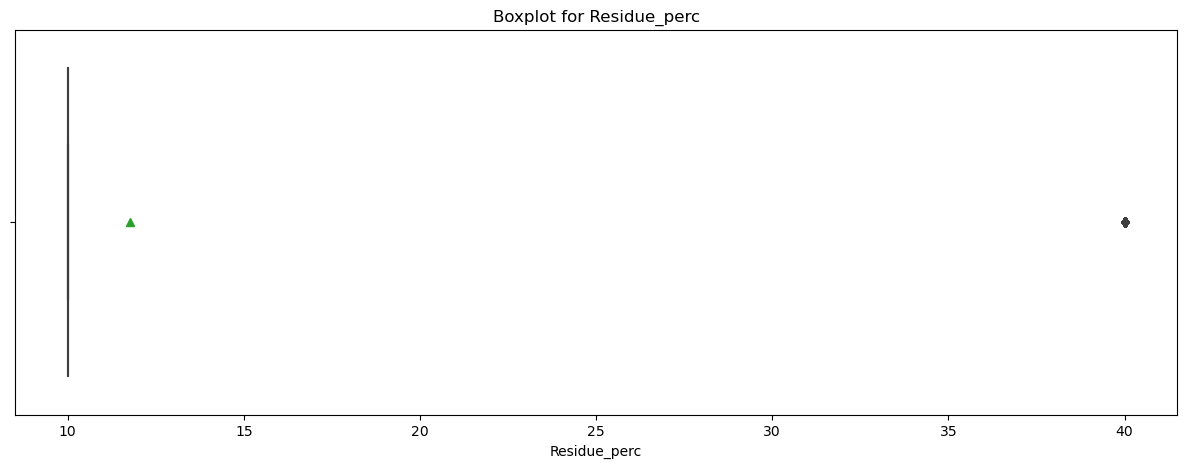

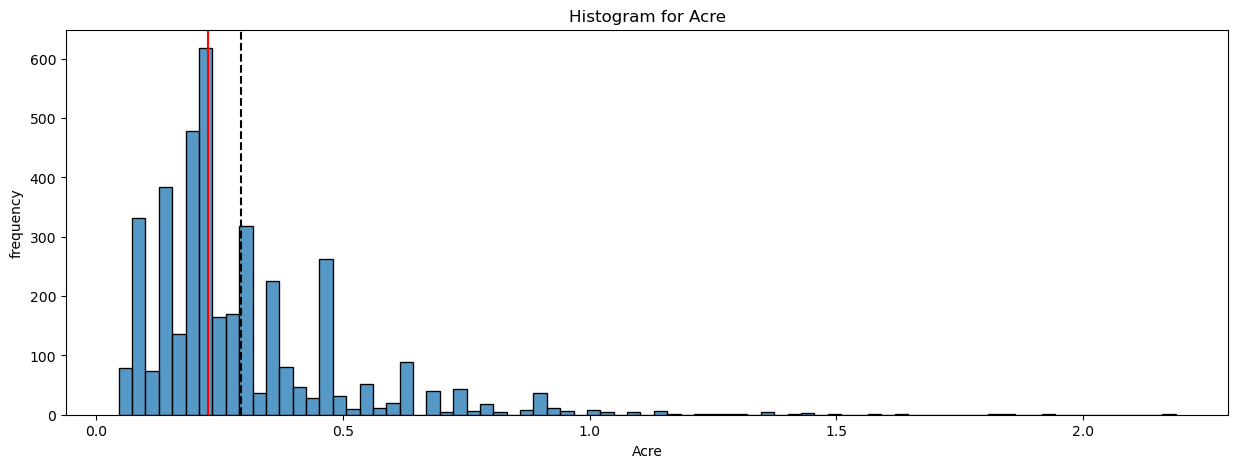

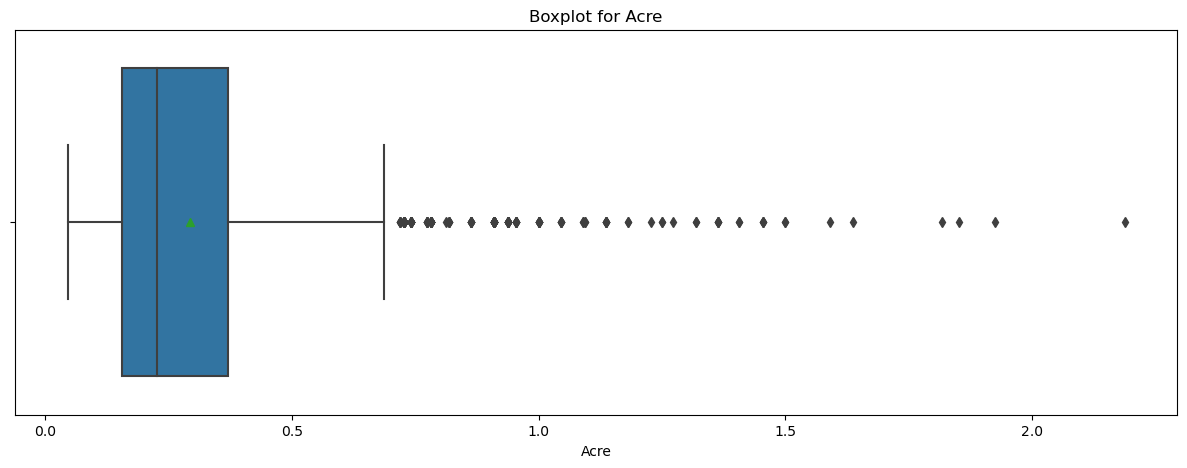

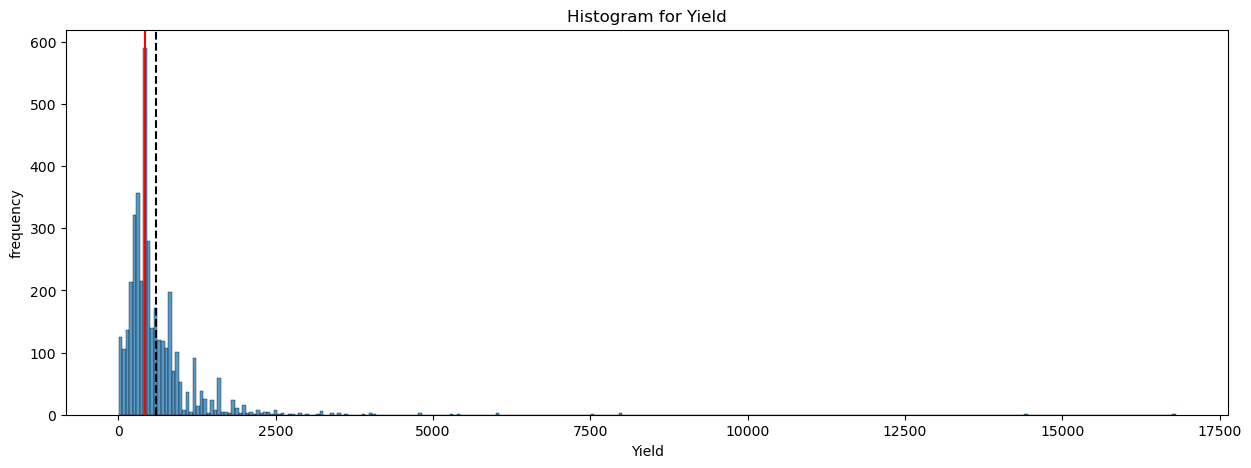

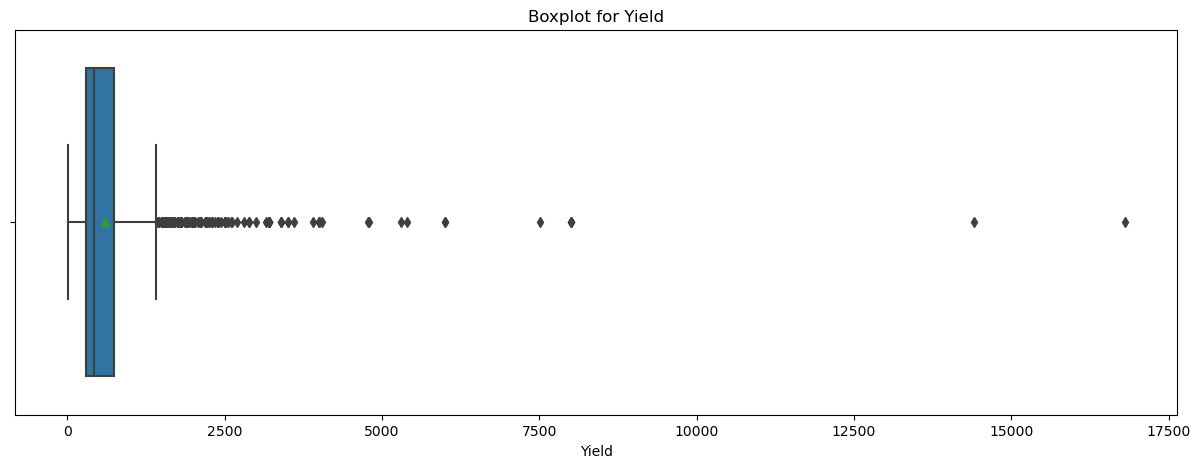

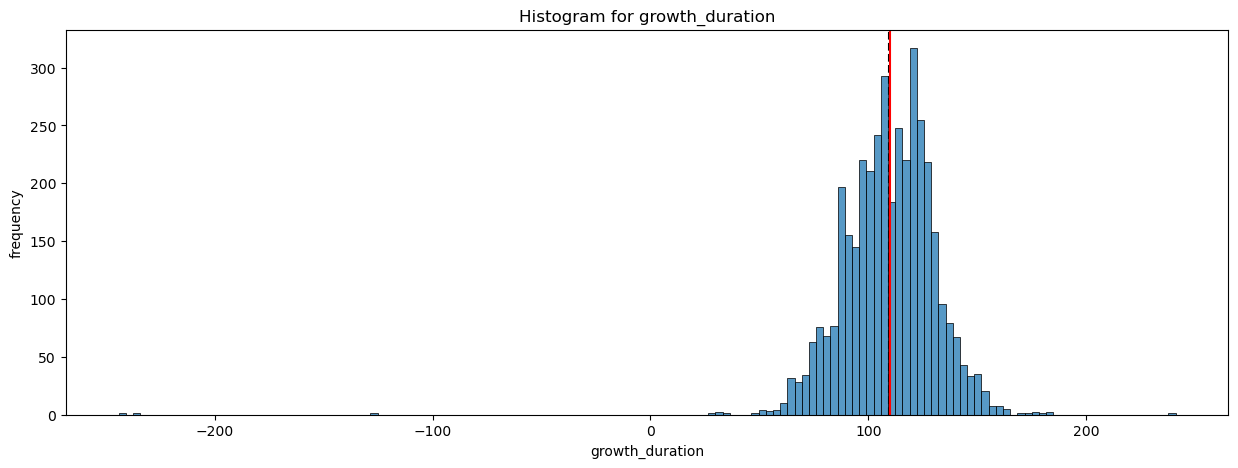

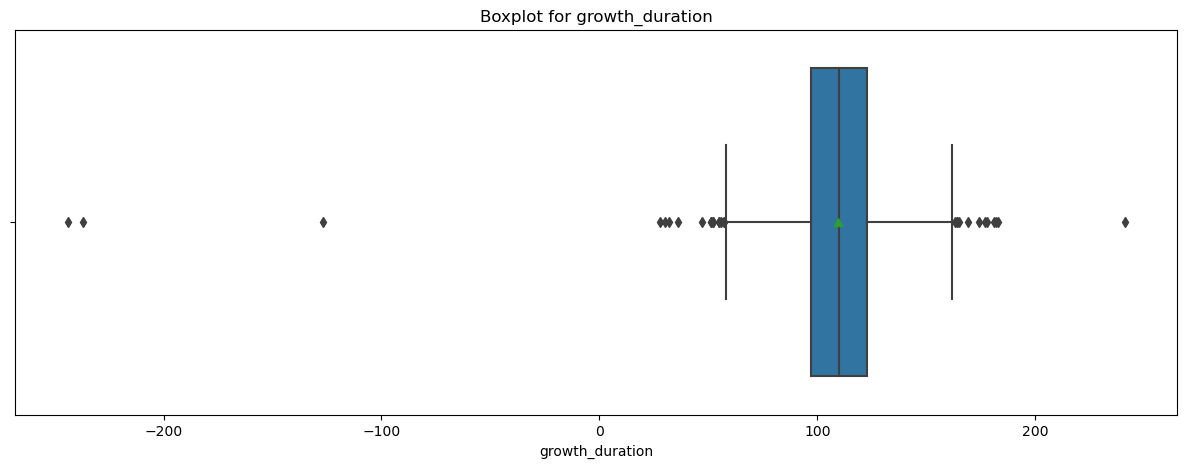

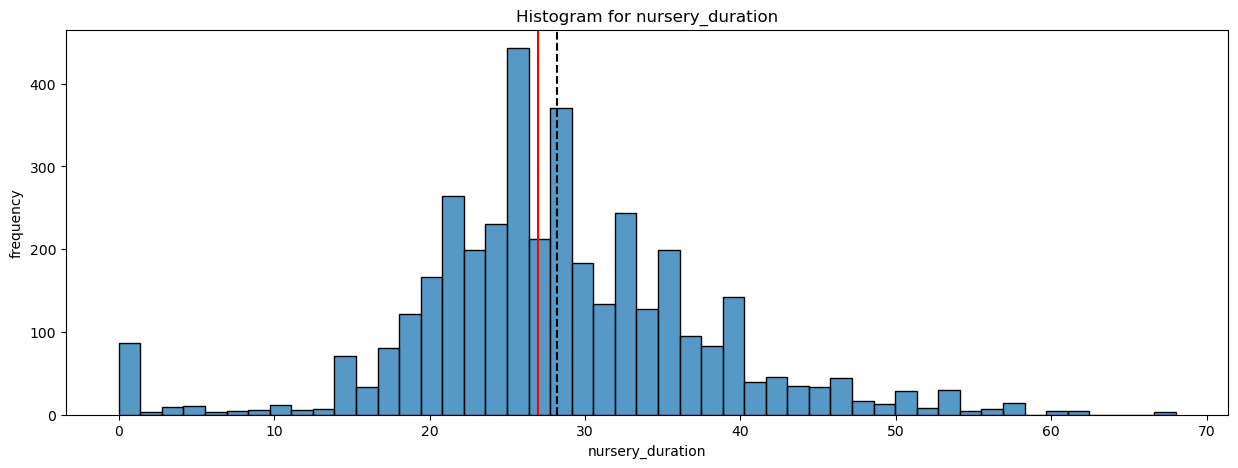

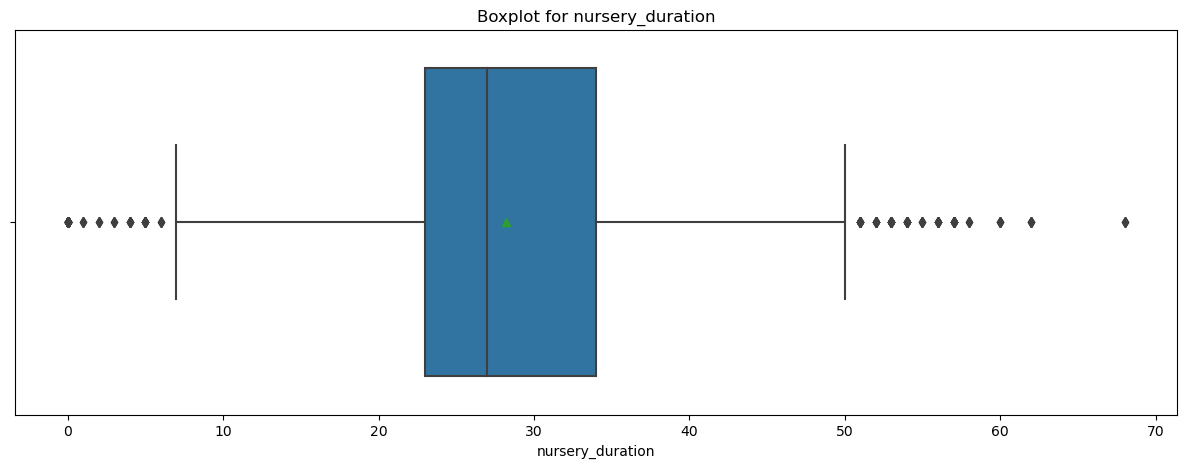

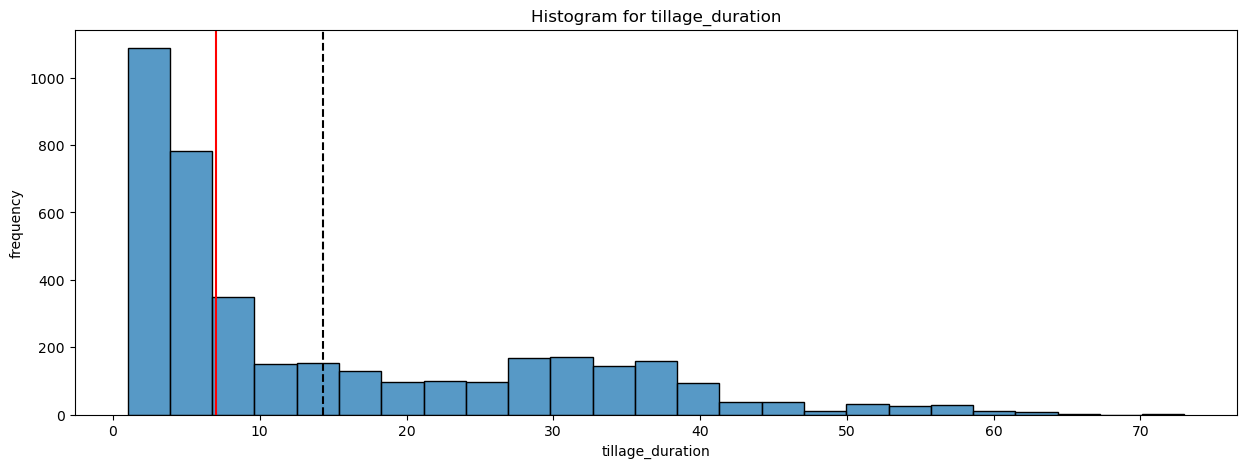

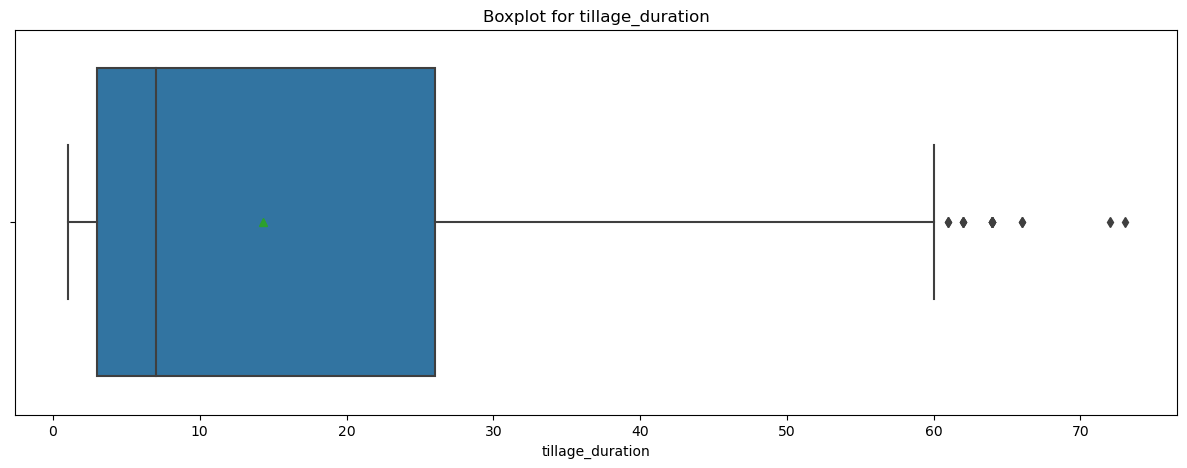

In [47]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns]:
    box_histplot(data,item)

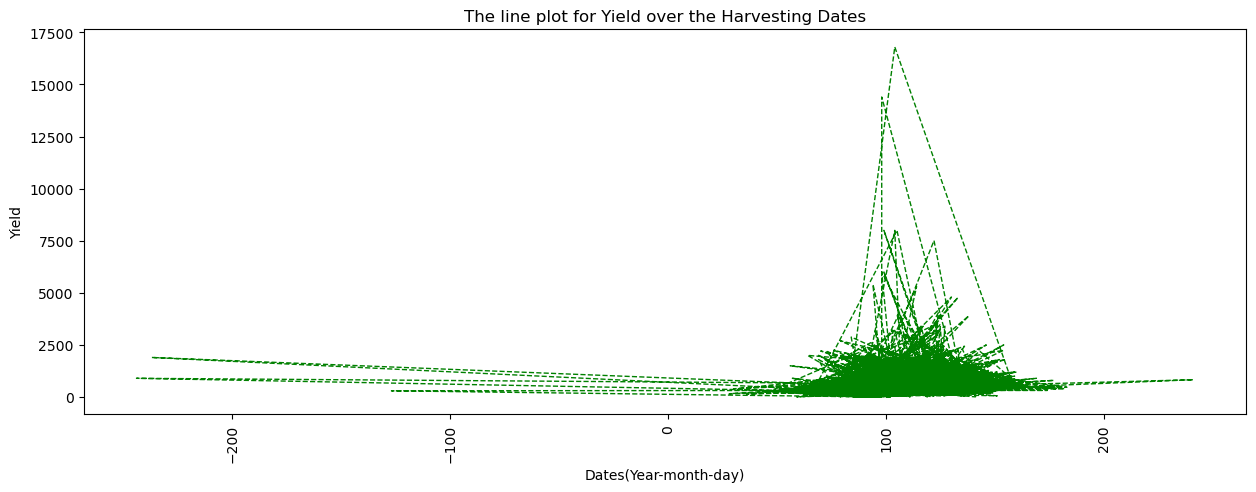

In [49]:
## Plot the Crop yield  time series data a period
plt.figure(figsize=(15,5)) 
plt.plot(data["growth_duration"],data["Yield"],color="green",linestyle="dashed",linewidth=1)
plt.title("The line plot for Yield over the Harvesting Dates")
plt.xlabel("Dates(Year-month-day)")
plt.ylabel("Yield")
plt.xticks(rotation=90)
plt.show()

## Categorical data analysis:

In [54]:
# Code to drop the mineralFertAppMethod.1 in the training and testing dataset
green_data = green_data.drop(['MineralFertAppMethod.1'],axis=1)
test_data = test_data.drop(['MineralFertAppMethod.1'],axis=1)

In [55]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))            # increase the size of the plot
    sns.countplot(data=data , x=item);   # countplot for categorical columns
    plt.title(f"Countplot for {item}")   # add the title on the countplot
    plt.ylabel("frequency")              # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

In [57]:
# Code to select categorical columns
categorical_data = green_data.select_dtypes("object").columns  

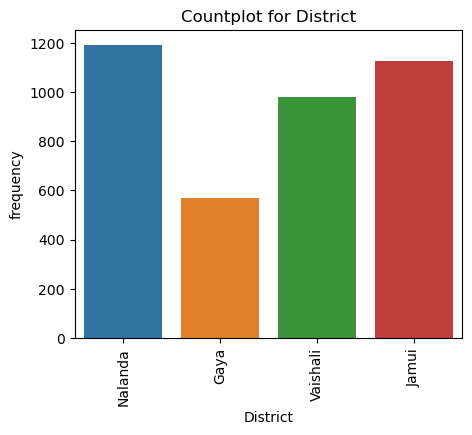

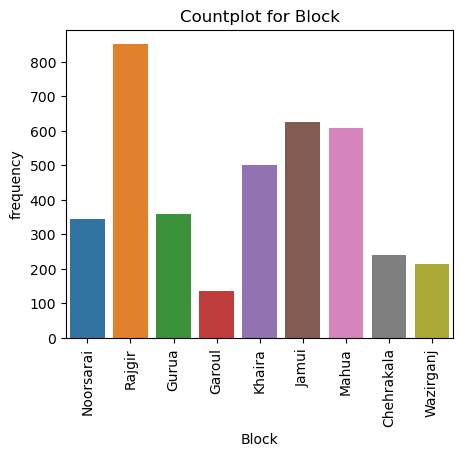

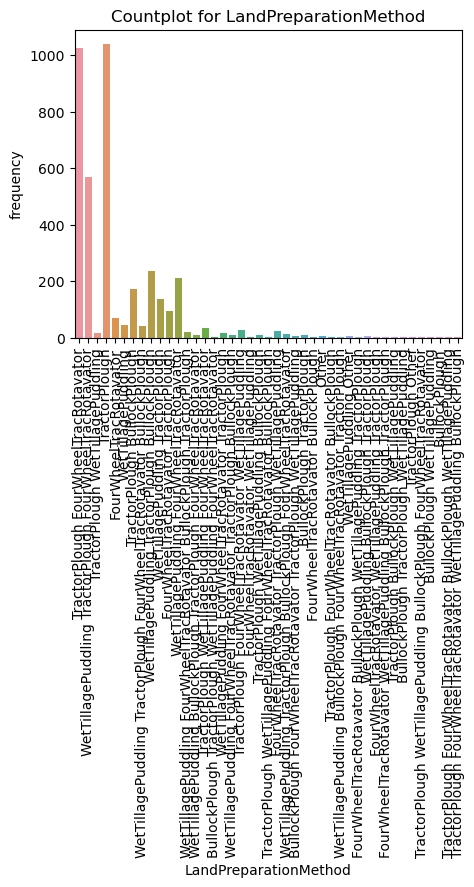

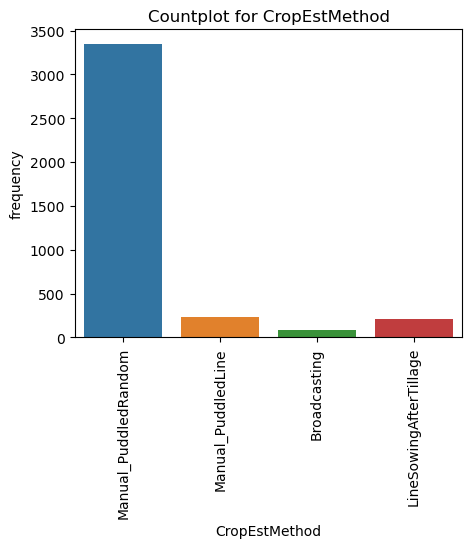

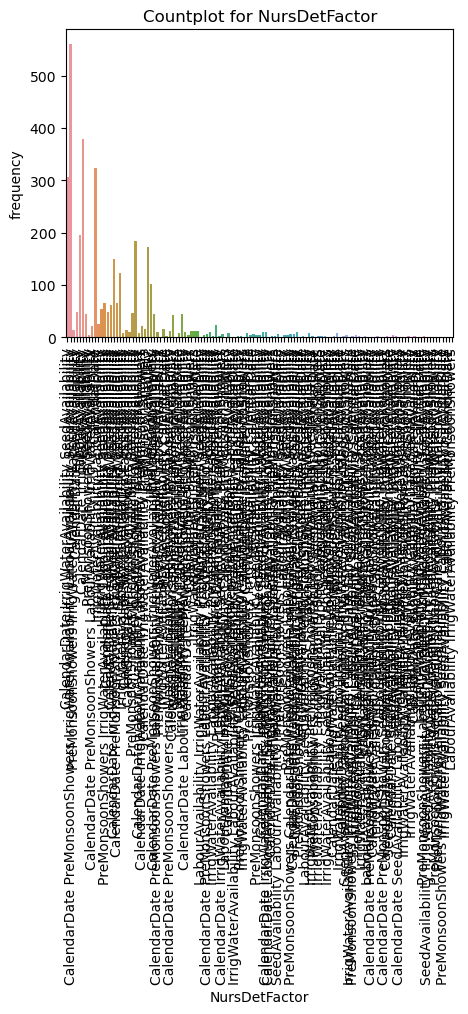

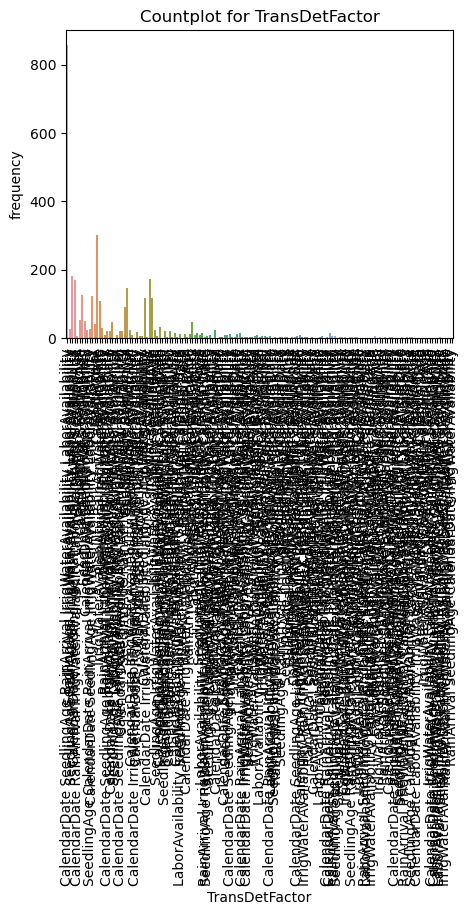

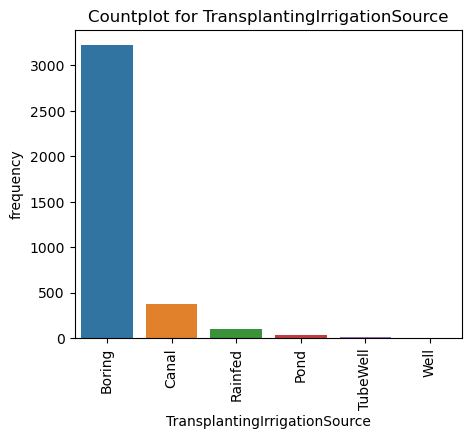

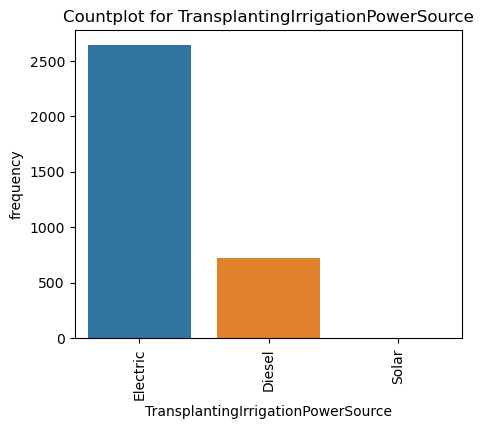

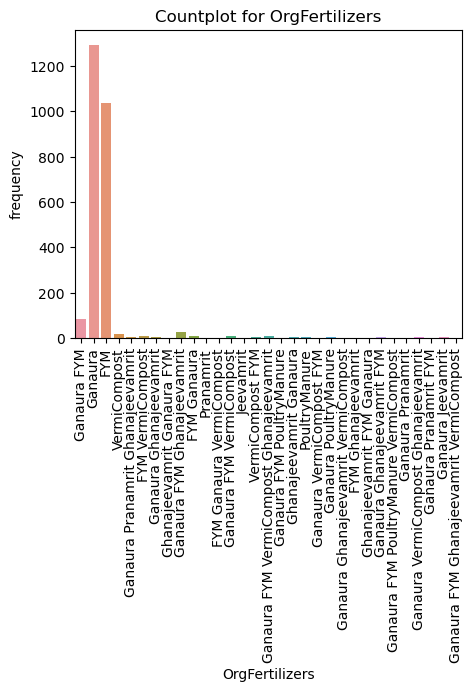

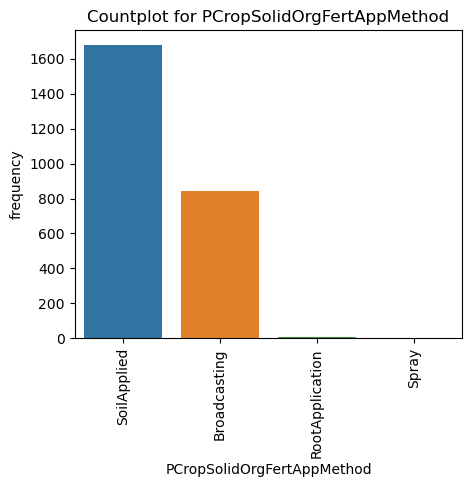

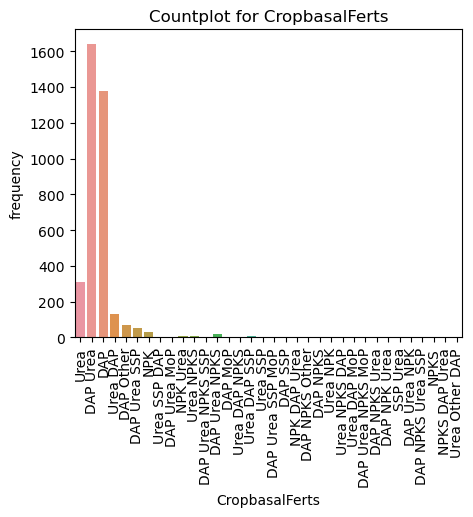

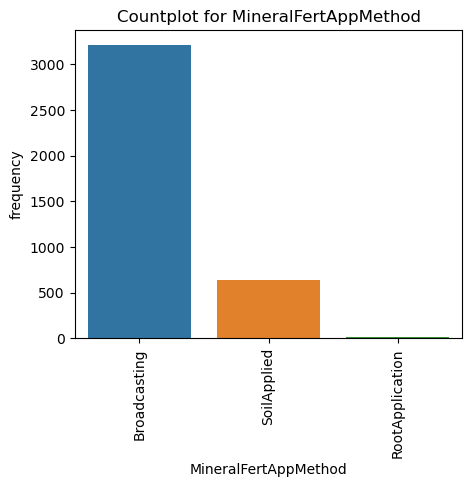

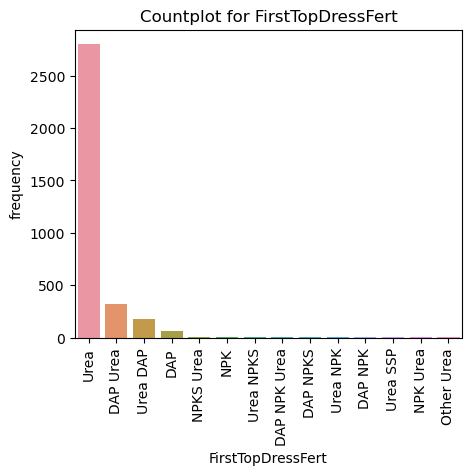

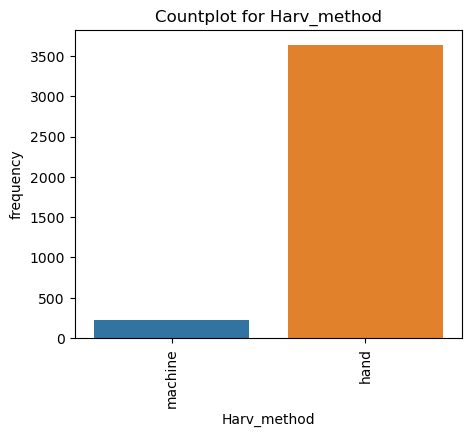

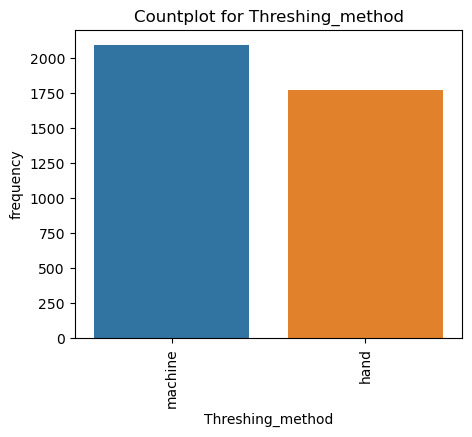

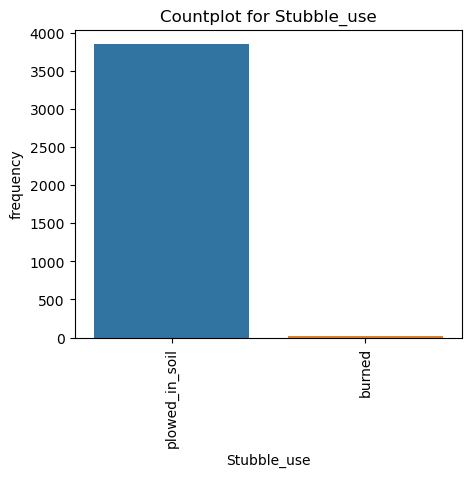

In [58]:
 for variable in categorical_data:
        count_plot(green_data,variable)

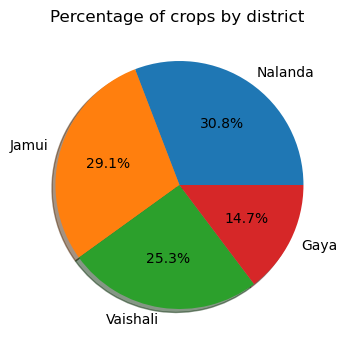

In [59]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data["District"].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of crops by district ")
plt.show()

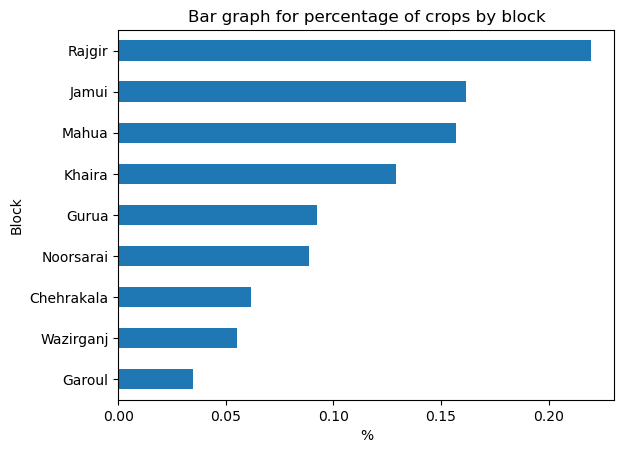

In [60]:
green_data["Block"].value_counts(normalize=True,ascending=True).plot(kind="barh",xlabel="%", ylabel="Block",
                                                 title="Bar graph for percentage of crops by block");

In [62]:
green_data['CropEstMethod'].value_counts(normalize=True,ascending=False)

CropEstMethod
Manual_PuddledRandom     0.865
Manual_PuddledLine       0.061
LineSowingAfterTillage   0.053
Broadcasting             0.021
Name: proportion, dtype: float64

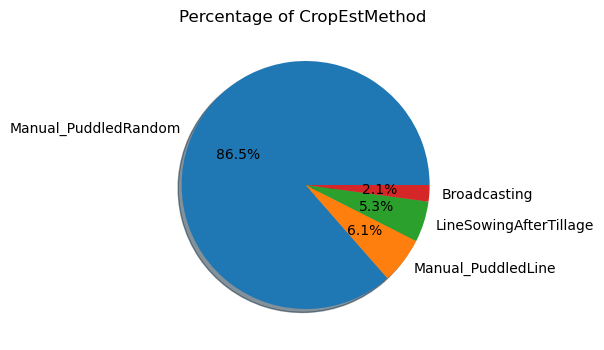

In [63]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data['CropEstMethod'].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of CropEstMethod ")
plt.show()

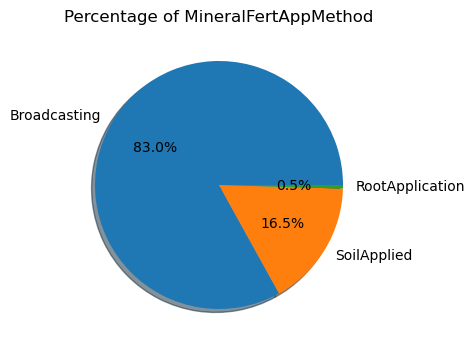

In [64]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data['MineralFertAppMethod'].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of MineralFertAppMethod")
plt.show()

In [66]:
green_data["Harv_method"].value_counts(normalize=True,ascending=False)

Harv_method
hand      0.941
machine   0.059
Name: proportion, dtype: float64

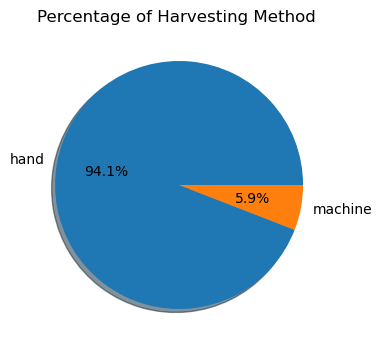

In [67]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data["Harv_method"].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of Harvesting Method ")
plt.show()

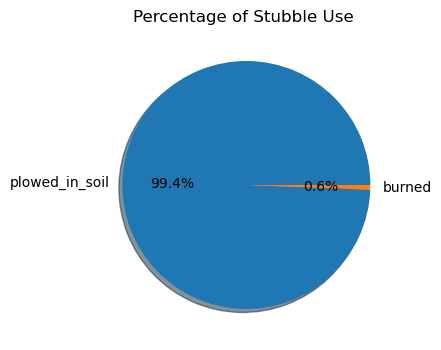

In [68]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data['Stubble_use'].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of Stubble Use ")
plt.show()

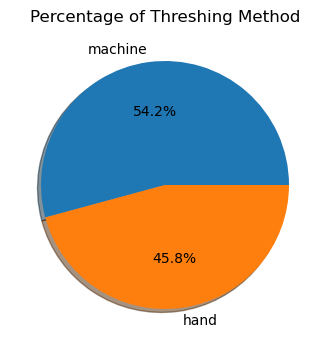

In [69]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data['Threshing_method'].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of Threshing Method")
plt.show()

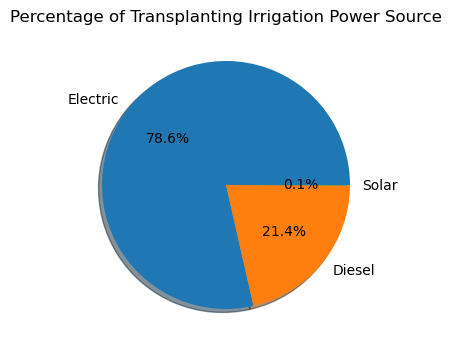

In [70]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = green_data['TransplantingIrrigationPowerSource'].value_counts() /green_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of Transplanting Irrigation Power Source")
plt.show()

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [73]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))                       # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

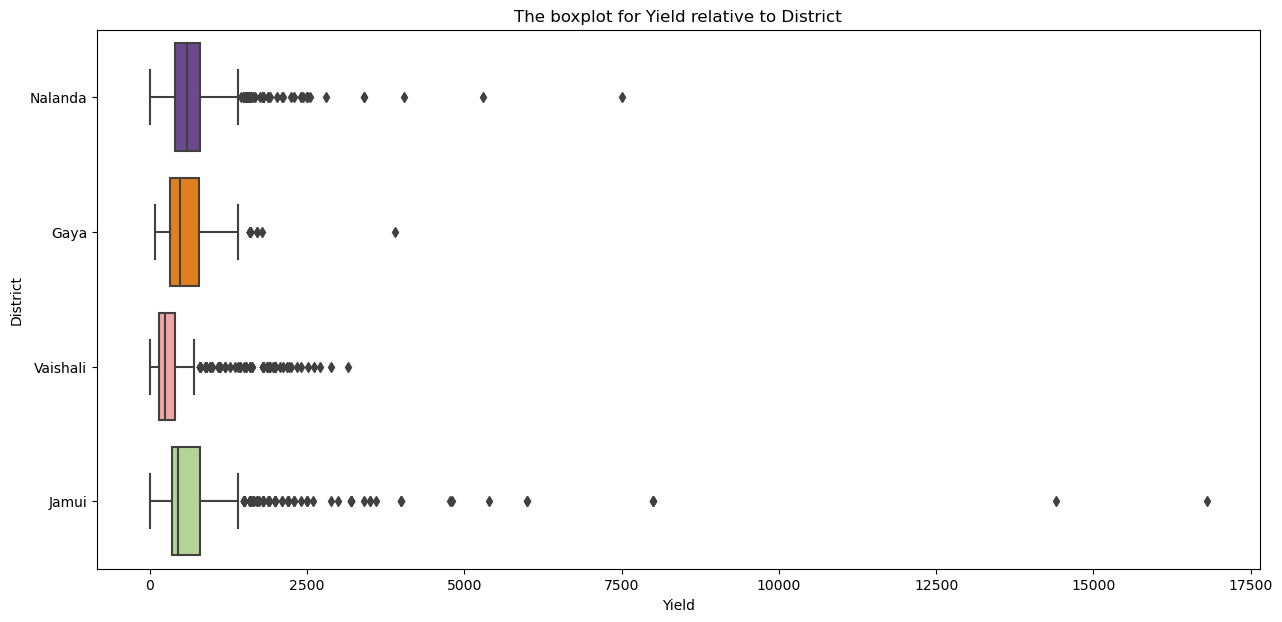

In [74]:
# Boxplot for yield relative to district 
box_plot(green_data,"Yield","District")

### Observation:


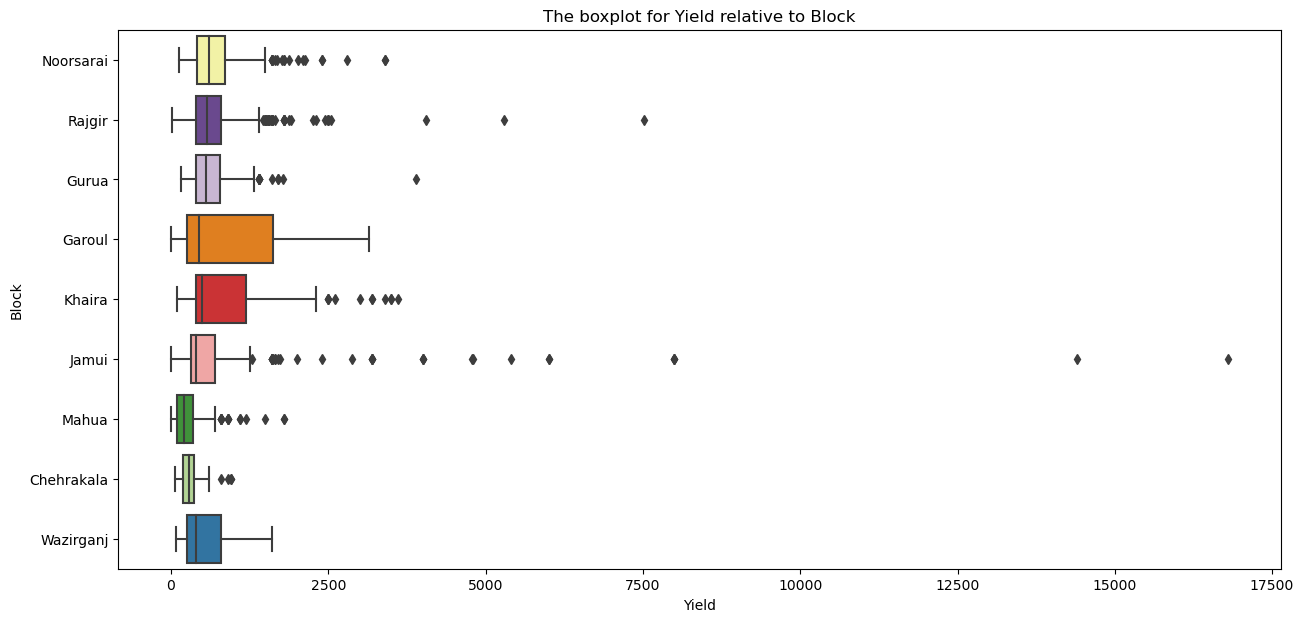

In [75]:
# Boxplot for yield by block
box_plot(green_data,"Yield","Block")

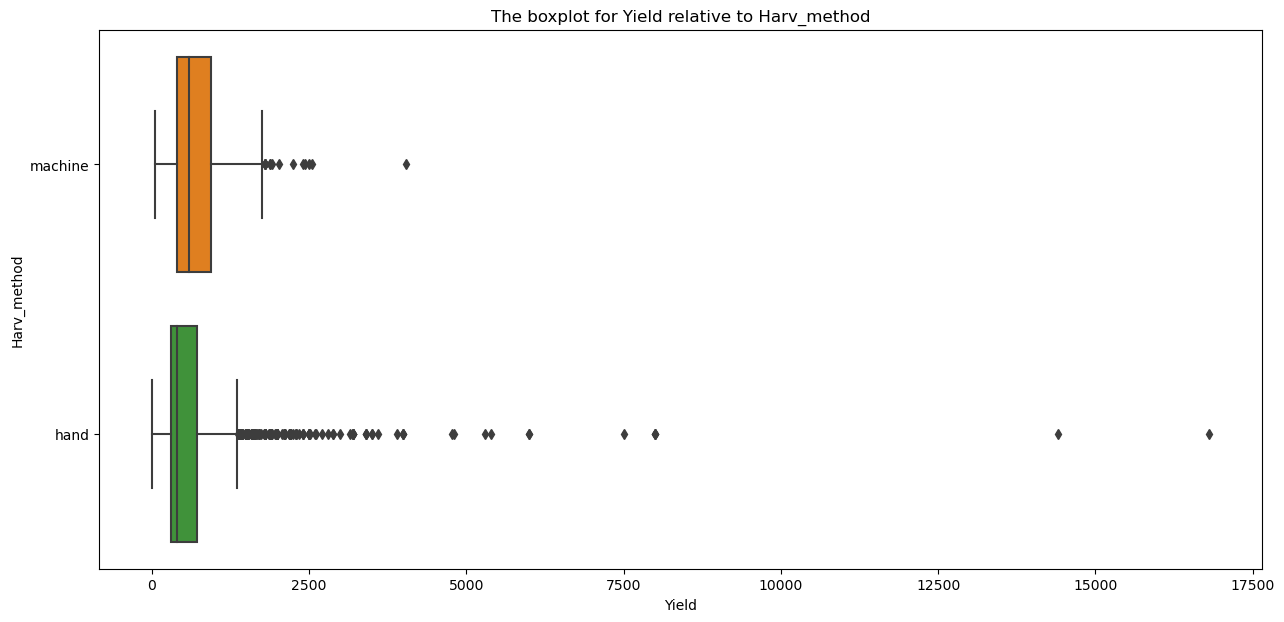

In [76]:
# Boxplot for yield by harv method
box_plot(green_data,"Yield",'Harv_method')

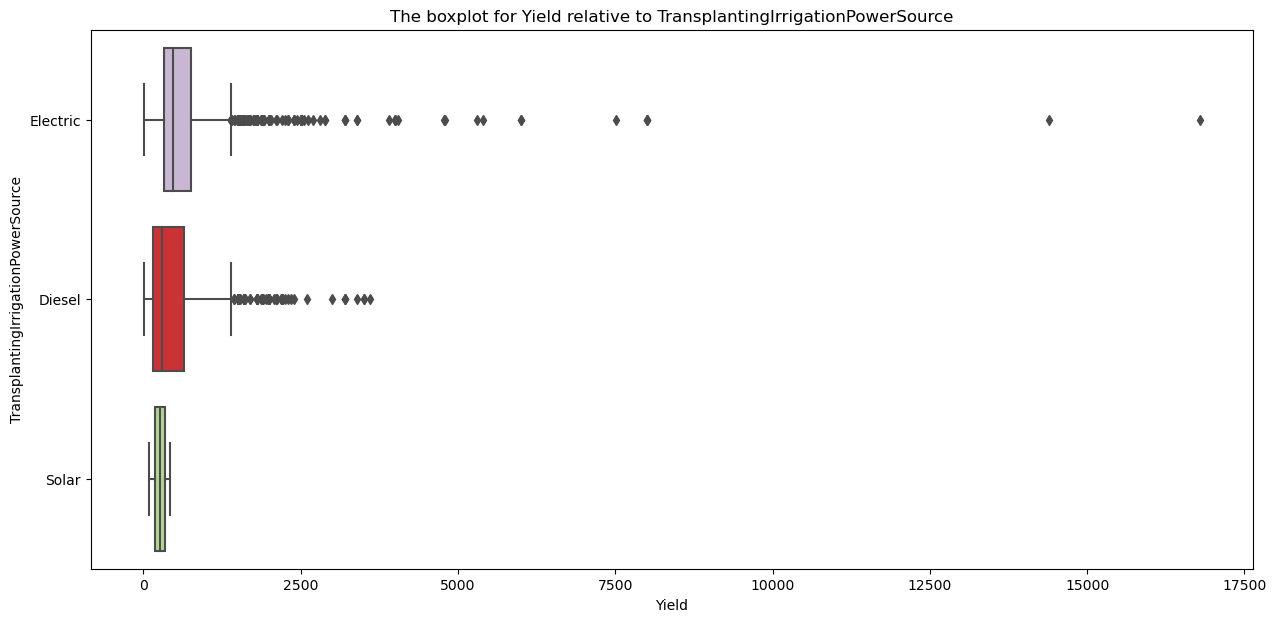

In [77]:
# Boxplot for yield by transplaingirrigationpowersource
box_plot(green_data,"Yield",'TransplantingIrrigationPowerSource')

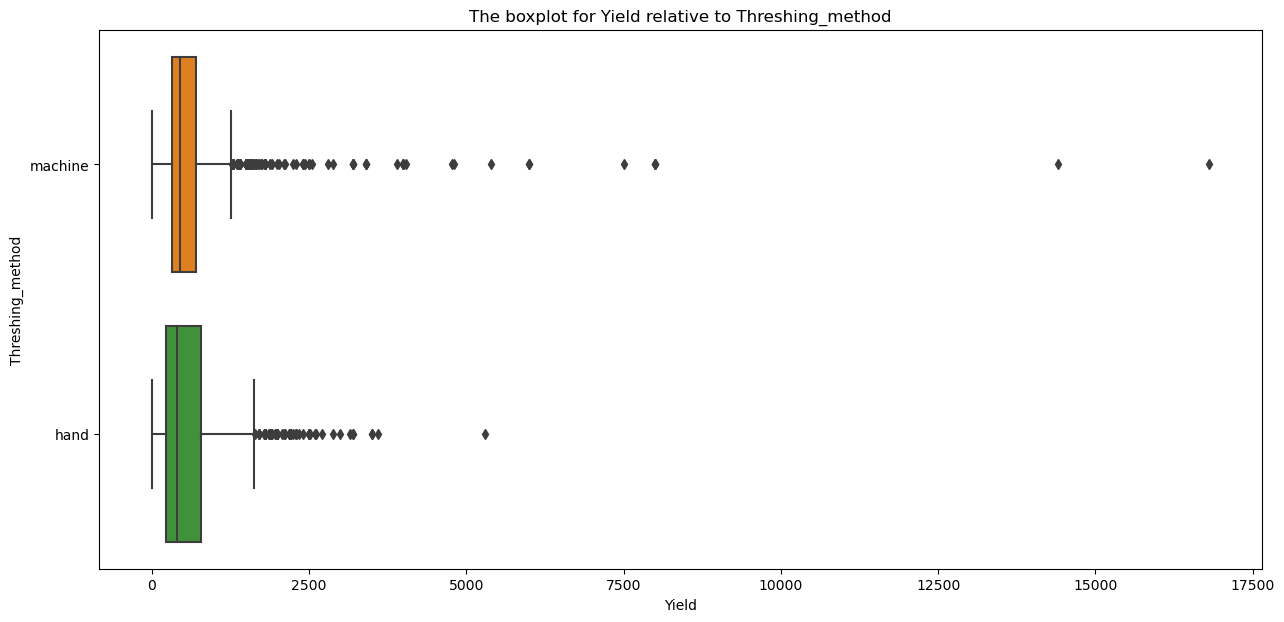

In [78]:
# Boxplot for yield by threshing metho
box_plot(green_data,"Yield","Threshing_method")

### Categorical data analysis only

In [79]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2,color):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette=color,hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

In [80]:
categorical_data

Index(['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'Harv_method', 'Threshing_method', 'Stubble_use'],
      dtype='object')

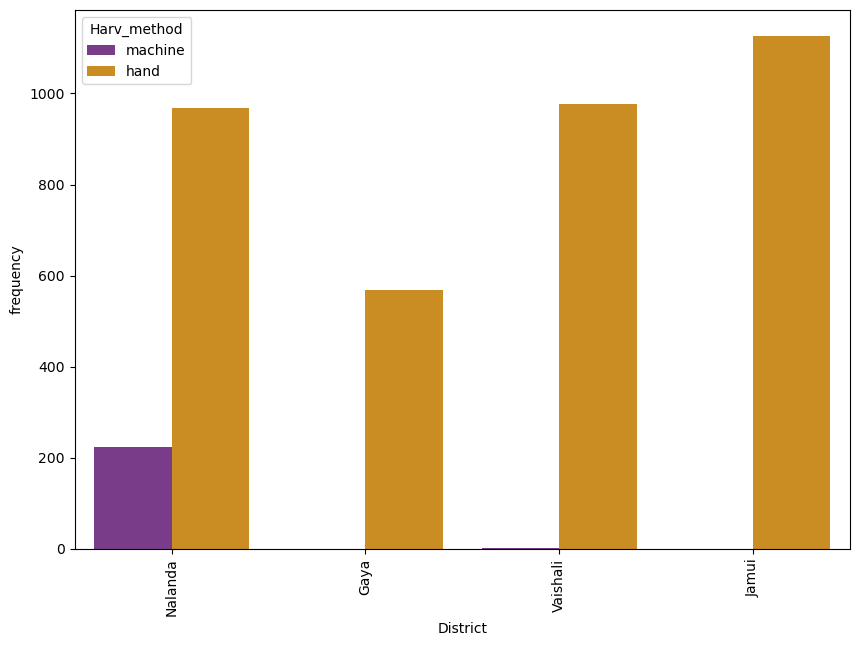

In [81]:
bivariate_plot(green_data,"District","Harv_method",color='CMRmap')

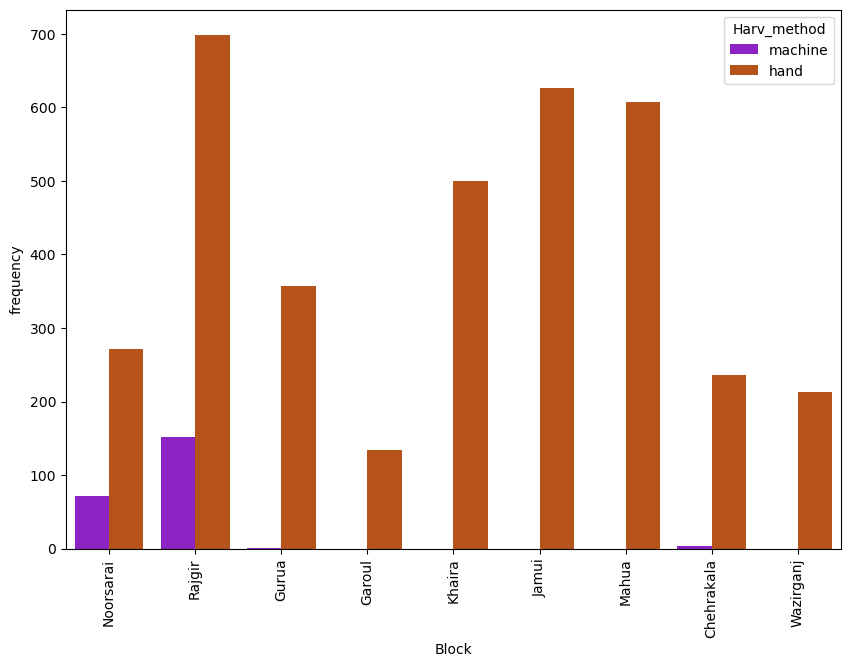

In [82]:
bivariate_plot(green_data,"Block","Harv_method",color='gnuplot')

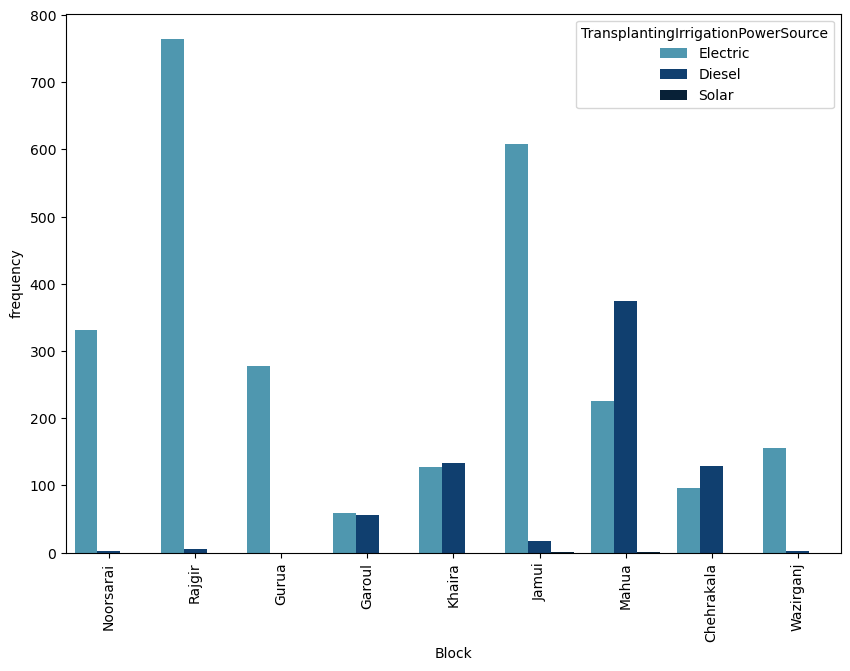

In [83]:
bivariate_plot(green_data,"Block",'TransplantingIrrigationPowerSource',color='ocean_r')

### Numerical data

In [84]:
df =green_data[numerical_columns].corr()   # compute the correlation matrix of the numerical columns

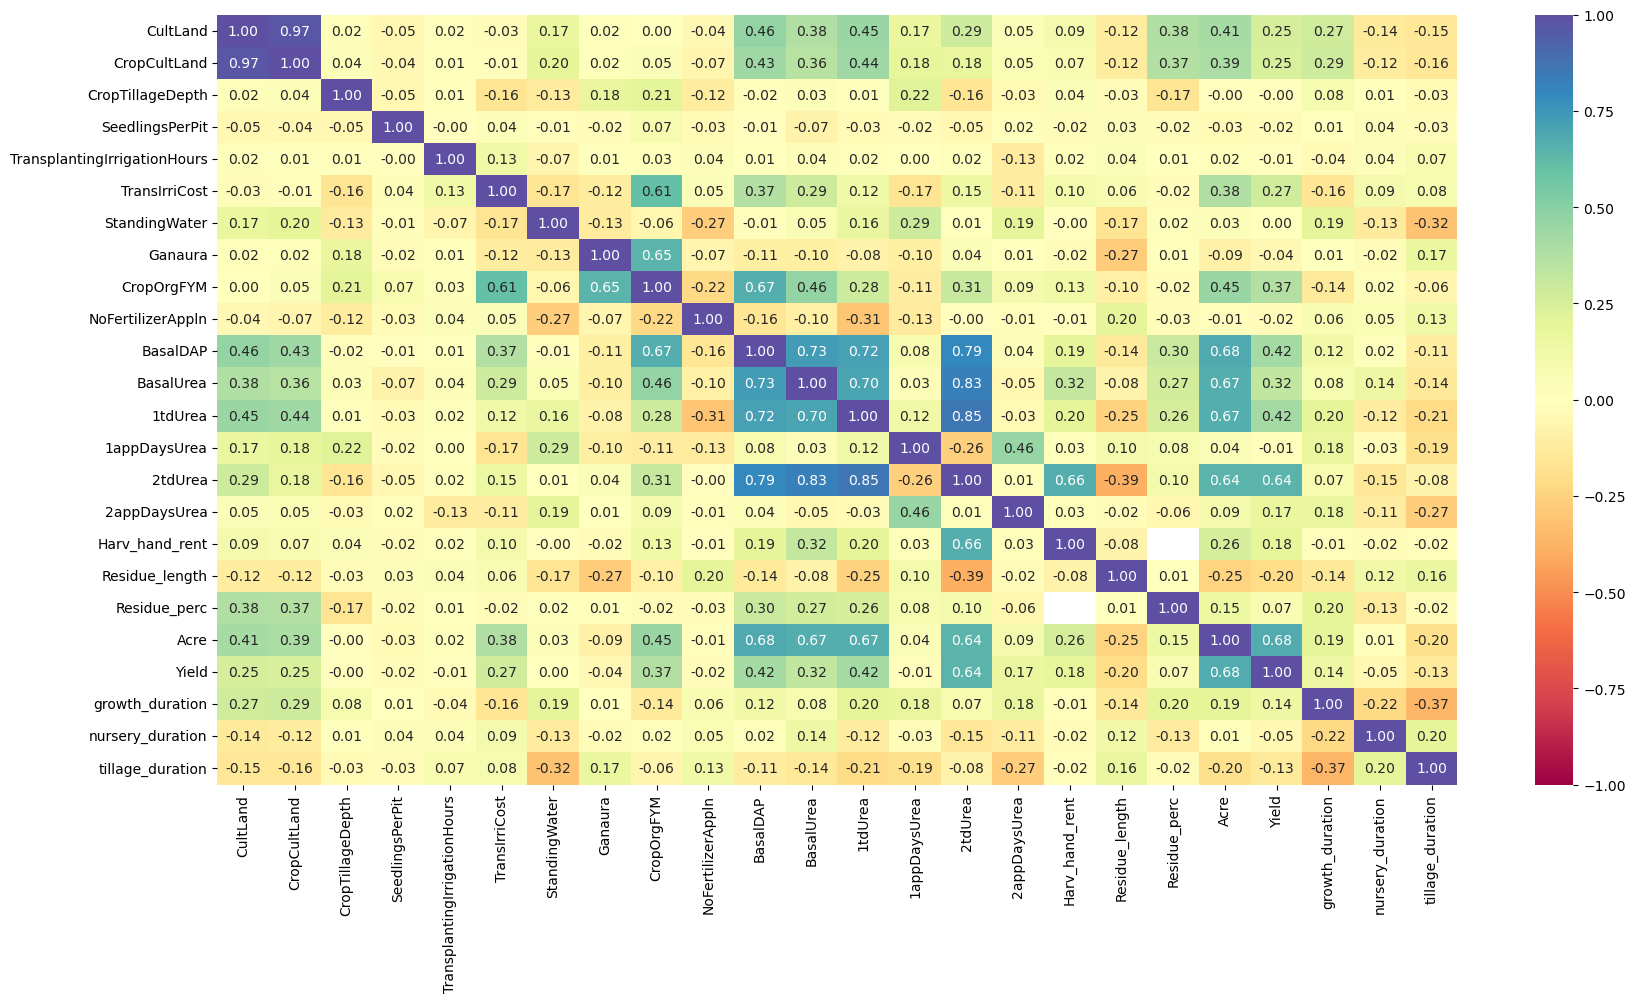

In [85]:
## Construct a correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df,annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [86]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [87]:
numerical_columns= green_data.select_dtypes("number").columns

In [88]:
### Now lets display the highly correlated columns
feature = correlation(green_data[numerical_columns],0.7)
print(feature)

{'2tdUrea', '1tdUrea', 'CropCultLand', 'BasalUrea'}


In [89]:
### Now drop one of the columns that are highly correlated. 
### Here we will drop the  frequency and revenue columns
green_data = green_data.drop(columns=['1tdUrea','CropCultLand','BasalUrea'],axis=1)

In [90]:
### Lets drop the column in the testing dataset
test_data = test_data.drop(columns=['1tdUrea','CropCultLand','BasalUrea'],axis=1)

In [91]:
green_data.shape

(3870, 37)

In [92]:
test_data.shape

(1290, 37)

In [93]:
test_data.head()

ID  District   Block  CultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira        20   
1  ID_SO3VW2X4QO93     Jamui  Khaira        25   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir        30   
3  ID_QUISMWEZR2H4  Vaishali   Mahua        15   
4  ID_25JGI455VKCZ   Nalanda  Rajgir        30   

                               LandPreparationMethod  CropTillageDepth  \
0                                      TractorPlough                 4   
1                                      TractorPlough                 5   
2  WetTillagePuddling TractorPlough FourWheelTrac...                 5   
3  WetTillagePuddling TractorPlough BullockPlough...                 5   
4  WetTillagePuddling TractorPlough FourWheelTrac...                 3   

          CropEstMethod  SeedlingsPerPit  \
0    Manual_PuddledLine            1.000   
1  Manual_PuddledRandom            4.000   
2  Manual_PuddledRandom            2.000   
3  Manual_PuddledRandom            2.000   
4  Manual_PuddledRandom            1.000   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         2.000                        Boring   
1                         2.000                         Canal   
2                         4.000                         Canal   
3                         2.000                        Boring   
4                         6.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel        200.000          2.000   
1                                NaN            NaN          3.000   
2                                NaN            NaN         10.000   
3                             Diesel            NaN            NaN   
4                           Electric        400.000            NaN   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            FYM      NaN       2.000                SoilApplied   
1            NaN      NaN         NaN                        NaN   
2        Ganaura    2.000         NaN               Broadcasting   
3            FYM      NaN       5.000                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP MineralFertAppMethod  \
0                  3            DAP     6.000         Broadcasting   
1                  3            DAP     5.000         Broadcasting   
2                  2       DAP Urea     9.000         Broadcasting   
3                  2            DAP    15.000          SoilApplied   
4                  2       DAP Urea    20.000         Broadcasting   

  FirstTopDressFert  1appDaysUrea  2tdUrea  2appDaysUrea Harv_method  \
0              Urea        23.000    6.000        63.000        hand   
1              Urea        23.000    8.000        65.000        hand   
2              Urea        38.000      NaN           NaN        hand   
3              Urea        30.000      NaN           NaN        hand   
4              Urea        40.000      NaN           NaN     machine   

   Harv_hand_rent Threshing_method  Residue_length  Residue_perc  \
0         500.000             hand              22            10   
1         150.000          machine              28            10   
2        1200.000          machine              28  

#### OUTLIER DETECTION AND TREATMENT

In [94]:
numerical_columns1= green_data.select_dtypes("number").columns

In [95]:
numerical_columns1

Index(['CultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP',
       '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'Yield', 'growth_duration',
       'nursery_duration', 'tillage_duration'],
      dtype='object')

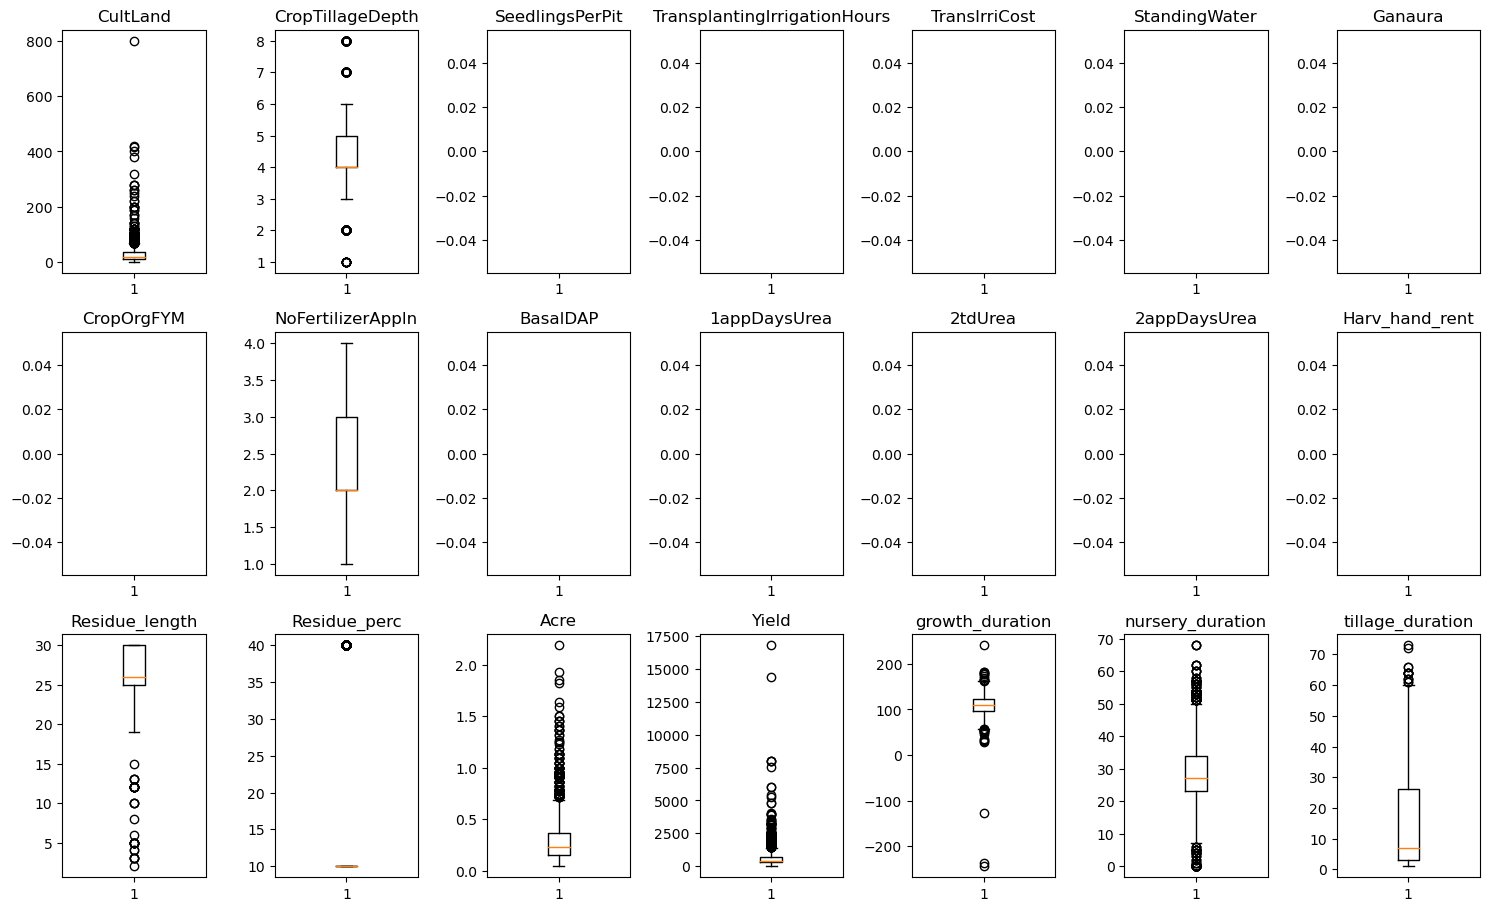

In [96]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns1):
    plt.subplot(4,7, i + 1)
    plt.boxplot(green_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Treatment of Outliers
* Some of the numerical columns have outliers on the upper fence of the whiskers
* We need to trim the data above the upper fence of the box and whisker diagram.

In [97]:
### Create a function to identify outliers
def outliers(df,item):
    Q1 = df[item].quantile(0.25)
    Q3 = df[item].quantile(0.75)
    IQR = Q3-Q1
    Lower_fence = Q1-1.5*IQR
    Upper_fence = Q3+1.5*IQR
    outlier_list = df.index[(df[item]<Lower_fence)|(df[item]>Upper_fence)]
    return outlier_list

In [100]:
train_cols1= ['CultLand', 'CropTillageDepth', 'SeedlingsPerPit',
      'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'NoFertilizerAppln', 'BasalDAP', '1appDaysUrea',
       'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre',
       'growth_duration', 'nursery_duration', 'tillage_duration']

In [101]:
### Now create an list to store the outliers
index_list = []   # create an empty list
for feature in train_cols1:
    ls=outliers(green_data,feature)
    index_list.extend(ls)

In [102]:
### Now define a function to remove the outliers
def remove(df,outlier_list):
    outlier_list = sorted(set(outlier_list))
    df = df.drop(outlier_list)
    return df

In [103]:
## Code to produce the clean data in the training set
green_data_clean = remove(green_data,index_list)

In [104]:
### Now reset the index of the dataset
green_data_clean.head()

District   Block  CultLand  \
1   Nalanda  Rajgir        26   
3      Gaya   Gurua        15   
5  Vaishali  Garoul        10   
6     Jamui  Khaira        12   
8     Jamui  Khaira        25   

                               LandPreparationMethod  CropTillageDepth  \
1  WetTillagePuddling TractorPlough FourWheelTrac...                 5   
3               TractorPlough FourWheelTracRotavator                 6   
5                                      TractorPlough                 6   
6                                      TractorPlough                 3   
8                                      TractorPlough                 4   

          CropEstMethod  SeedlingsPerPit  \
1  Manual_PuddledRandom            2.000   
3  Manual_PuddledRandom            2.000   
5    Manual_PuddledLine            1.000   
6  Manual_PuddledRandom            4.000   
8  Manual_PuddledRandom            4.000   

                                       NursDetFactor  \
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
5                      CalendarDate SeedAvailability   
6                      CalendarDate SeedAvailability   
8                      CalendarDate SeedAvailability   

                                      TransDetFactor  \
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
5  CalendarDate SeedlingAge RainArrival IrrigWate...   
6  CalendarDate SeedlingAge RainArrival IrrigWate...   
8  CalendarDate SeedlingAge RainArrival IrrigWate...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
1                         5.000                        Boring   
3                           NaN                           NaN   
5                         1.000                        Boring   
6                         1.000                         Canal   
8                         2.000                         Canal   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
1                           Electric        125.000          3.000   
3                                NaN            NaN            NaN   
5                           Electric            NaN          3.000   
6                                NaN            NaN          6.000   
8                                NaN            NaN          5.000   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
1            NaN      NaN         NaN                        NaN   
3        Ganaura    1.000         NaN                SoilApplied   
5            FYM      NaN       5.000                SoilApplied   
6        Ganaura    1.000         NaN                SoilApplied   
8            FYM      NaN       2.000                SoilApplied   

   NoFertilizerAppln CropbasalFerts  BasalDAP MineralFertAppMethod  \
1                  2       DAP Urea    15.000         Broadcasting   
3                  2       DAP Urea     6.000         Broadcasting   
5                  2      DAP Other     6.000          SoilApplied   
6                  3            DAP     3.000         Broadcasting   
8                  3            DAP     5.000         Broadcasting   

  FirstTopDressFert  1appDaysUrea  2tdUrea  2appDaysUrea Harv_method  \
1              Urea        39.000      NaN           NaN        hand   
3              Urea         5.000      NaN           NaN        hand   
5              Urea        30.000      NaN           NaN        hand   
6              Urea        28.000    6.000        67.000        hand   
8              Urea        20.000    7.000        58.000        hand   

   Harv_hand_rent Threshing_method  Residue_length  Residue_perc  \
1           3.000          machine              24            10   
3         240.000             hand              26            10   
5         600.000             hand              30            10   
6         130.000          machine              25            10   
8    

In [105]:
### sort the index of the cleaned dataset
green_data_clean = green_data_clean.sort_index()

In [106]:
green_data_clean.shape

(2249, 37)

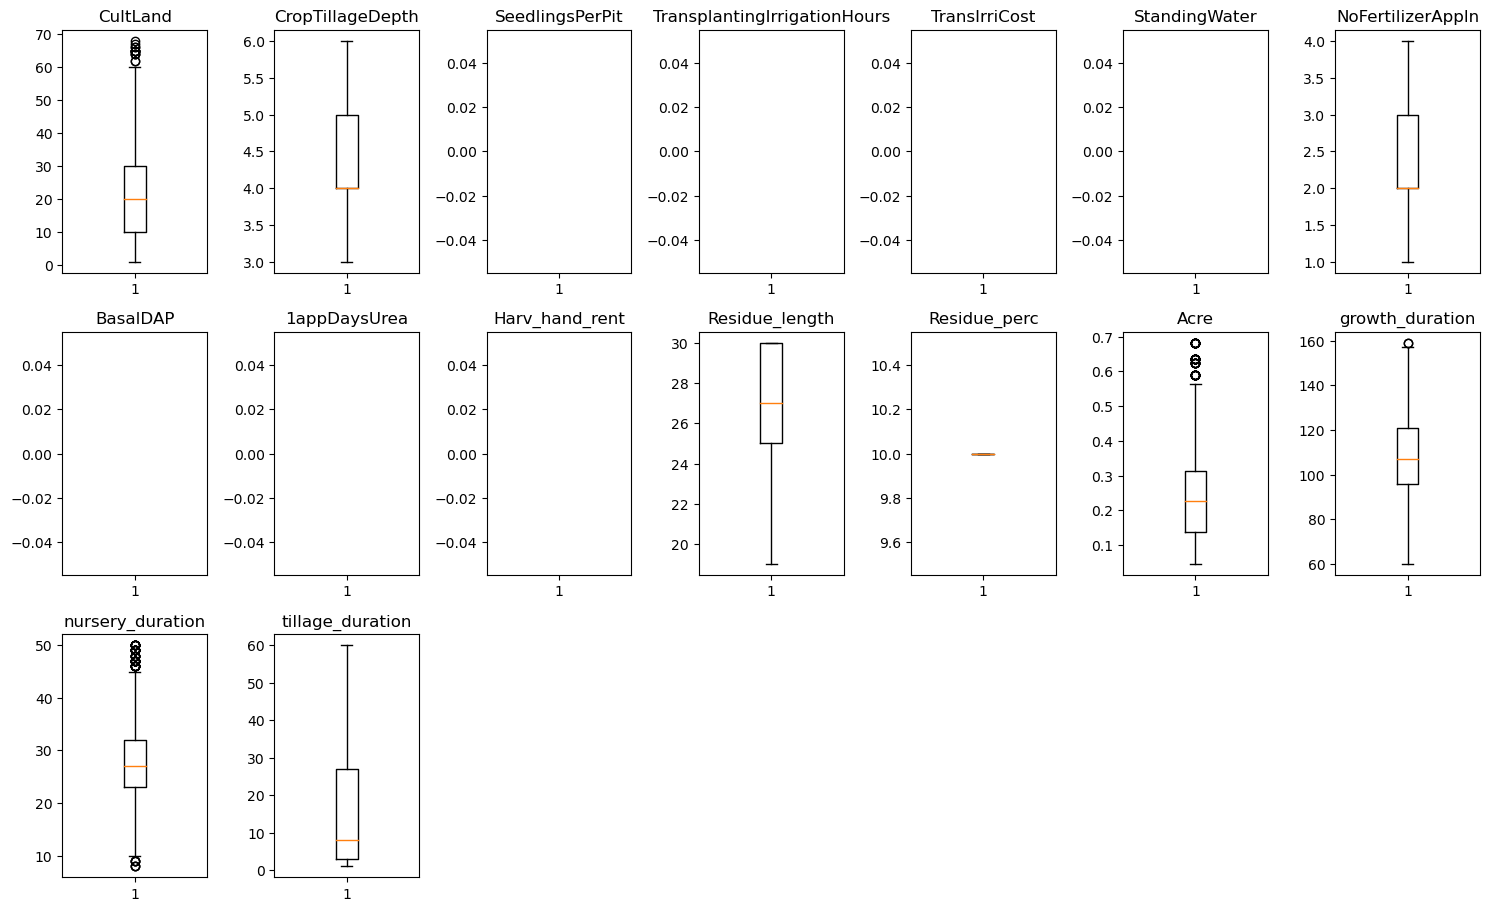

In [107]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(train_cols1):
    plt.subplot(4,7, i + 1)
    plt.boxplot(green_data_clean[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Split the data into train and validation sets

In [108]:
data1 =green_data.copy()

In [109]:
# Dividing train data into X and y 
X = data1.drop(["Yield"], axis=1)
y = data1["Yield"]

In [110]:
# Splitting the dataset into training and validation set into a ratio of 75:25 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=42)

In [111]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 2902 rows and 36 columns


In [112]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 968 rows and 36 columns


In [113]:
X_train.head()

District      Block  CultLand                 LandPreparationMethod  \
1075   Nalanda  Noorsarai        30  TractorPlough FourWheelTracRotavator   
2098  Vaishali      Mahua         5  TractorPlough FourWheelTracRotavator   
2725      Gaya      Gurua        40  TractorPlough FourWheelTracRotavator   
907       Gaya      Gurua        15  TractorPlough FourWheelTracRotavator   
1798      Gaya      Gurua        15  TractorPlough FourWheelTracRotavator   

      CropTillageDepth         CropEstMethod  SeedlingsPerPit  \
1075                 3  Manual_PuddledRandom            2.000   
2098                 4  Manual_PuddledRandom            1.000   
2725                 6  Manual_PuddledRandom            2.000   
907                  5  Manual_PuddledRandom            3.000   
1798                 7  Manual_PuddledRandom            4.000   

                                          NursDetFactor  \
1075                CalendarDate IrrigWaterAvailability   
2098  CalendarDate SeedAvailability IrrigWaterAvaila...   
2725  CalendarDate IrrigWaterAvailability LabourAvai...   
907                 CalendarDate IrrigWaterAvailability   
1798  CalendarDate PreMonsoonShowers LabourAvailabil...   

                                         TransDetFactor  \
1075                                       CalendarDate   
2098  LaborAvailability IrrigWaterAvailability Calen...   
2725     SeedlingAge IrrigWaterAvailability RainArrival   
907   CalendarDate SeedlingAge RainArrival IrrigWate...   
1798  CalendarDate SeedlingAge RainArrival IrrigWate...   

      TransplantingIrrigationHours TransplantingIrrigationSource  \
1075                         4.000                        Boring   
2098                         3.000                        Boring   
2725                         9.000                        Boring   
907                          5.000                        Boring   
1798                           NaN                           NaN   

     TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
1075                           Electric        320.000          8.000   
2098                           Electric       1000.000          2.000   
2725                           Electric        300.000          3.000   
907                            Electric        150.000          3.000   
1798                                NaN            NaN          4.000   

                               OrgFertilizers  Ganaura  CropOrgFYM  \
1075                                      NaN      NaN         NaN   
2098                                      FYM      NaN       1.000   
2725  Ganaura FYM VermiCompost Ghanajeevamrit    1.000       1.000   
907                                   Ganaura    1.000         NaN   
1798                                      NaN      NaN         NaN   

     PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  BasalDAP  \
1075                        NaN                  2           Urea       NaN   
2098                SoilApplied                  3       Urea DAP    10.000   
2725               Broadcasting                  2            DAP    10.000   
907                 SoilApplied                  2            DAP    10.000   
1798                        NaN                  3            DAP     4.000   

     MineralFertAppMethod FirstTopDressFert  1appDaysUrea  2tdUrea  \
1075         Broadcasting              Urea        35.000      NaN   
2098          SoilApplied              Urea        22.000   10.000   
2725         Broadcasting              Urea        45.000      NaN   
907          Broadcasting              Urea        32.000      NaN   
1798         Broadcasting              Urea        22.000    2.000   

      2appDaysUrea Harv_method  Harv_hand_rent Threshing_method  \
1075           NaN        hand         800.000          machine   
2098        45.000        hand         200.000             hand   
2725           NaN        hand        1200.000          machine   
907      

## Data preprocessing

### Feature engineering

### Dealing with missing Values

In [114]:
X_train.isnull().sum()/X_train.shape[0] *100

District                              0.000
Block                                 0.000
CultLand                              0.000
LandPreparationMethod                 0.000
CropTillageDepth                      0.000
CropEstMethod                         0.000
SeedlingsPerPit                       7.099
NursDetFactor                         7.099
TransDetFactor                        7.099
TransplantingIrrigationHours          5.169
TransplantingIrrigationSource         3.067
TransplantingIrrigationPowerSource   13.611
TransIrriCost                        22.812
StandingWater                         5.927
OrgFertilizers                       34.356
Ganaura                              62.405
CropOrgFYM                           69.159
PCropSolidOrgFertAppMethod           34.425
NoFertilizerAppln                     0.000
CropbasalFerts                        4.686
BasalDAP                             14.300
MineralFertAppMethod                  0.000
FirstTopDressFert               

In [115]:
X_val.isnull().sum()/X_val.shape[0] *100

District                              0.000
Block                                 0.000
CultLand                              0.000
LandPreparationMethod                 0.000
CropTillageDepth                      0.000
CropEstMethod                         0.000
SeedlingsPerPit                       8.574
NursDetFactor                         8.574
TransDetFactor                        8.574
TransplantingIrrigationHours          4.442
TransplantingIrrigationSource         2.686
TransplantingIrrigationPowerSource   11.157
TransIrriCost                        22.727
StandingWater                         6.818
OrgFertilizers                       34.917
Ganaura                              62.603
CropOrgFYM                           68.905
PCropSolidOrgFertAppMethod           34.917
NoFertilizerAppln                     0.000
CropbasalFerts                        5.372
BasalDAP                             13.223
MineralFertAppMethod                  0.000
FirstTopDressFert               

In [116]:
## We need to drop columns with missing values greater than 50% in training dataset

In [117]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in green_data.columns:
    if ((green_data[item].isnull().sum()/green_data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

['Ganaura', 'CropOrgFYM', '2tdUrea', '2appDaysUrea']


In [118]:
## Now lets drop those columns with missing values above 50% in training dataset
X_train = X_train.drop(columns=col_feature,axis=1)

In [119]:
## Now lets drop those columns with missing values above 50% in validation dataset
X_val = X_val.drop(columns=col_feature,axis=1)

In [120]:
X_train.shape

(2902, 32)

In [121]:
## Now drop the columns in the testing dataset
test_data = test_data.drop(columns=col_feature,axis=1)

In [122]:
test_data.shape

(1290, 33)

In [123]:
### Now impute the numerical missing value columns
## We will impute the median as its not affected by extreme values/outliers

In [124]:
### code to select the numerical columns in the training dataset
train_cols = X_train.select_dtypes("number").columns

In [125]:
train_cols

Index(['CultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'NoFertilizerAppln', 'BasalDAP', '1appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'growth_duration',
       'nursery_duration', 'tillage_duration'],
      dtype='object')

In [126]:
# To impute missing values
from sklearn.impute import SimpleImputer

### Perfom imputation of missing values in the training set

In [127]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[train_cols] = median_imputer.fit_transform(X_train[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0165


In [128]:
X_train[train_cols].isnull().sum().sum()

0

### Imputation for categorical columns in the training dataset

In [129]:
### Imputation for categorical columns in the training dataset
## Select categorical columns and perform imputation
categorical_train_cols=X_train.select_dtypes("object").columns

In [130]:
categorical_train_cols

Index(['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'Harv_method', 'Threshing_method', 'Stubble_use'],
      dtype='object')

In [131]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[categorical_train_cols] = mode_imputer.fit_transform(X_train[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0177


In [132]:
X_train[categorical_train_cols].isnull().sum().sum()

0

### Perfom imputation of missing values in the training set for numerical columns

In [133]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0115


In [134]:
X_val[train_cols].isnull().sum().sum()

0

### Perfom imputation of missing values in the validation set for categorical columns

In [135]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[categorical_train_cols] = mode_imputer.fit_transform(X_val[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0116


In [136]:
X_val[categorical_train_cols].isnull().sum().sum()

0

## Now do the same for the testing dataset

In [137]:
### Code to select the numerical columns in the testing dataset
test_cols = test_data.select_dtypes("number").columns

In [138]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
test_data[test_cols] = median_imputer.fit_transform(test_data[test_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0126


In [139]:
### Now check for the present of missing values
test_data[test_cols].isnull().sum().sum()

0

In [140]:
### Imputation for categorical columns
## Select categorical columns in the testing dataset and perform imputation
categorical_test_cols=test_data.select_dtypes("object").columns

In [141]:
categorical_test_cols

Index(['ID', 'District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'Harv_method', 'Threshing_method', 'Stubble_use'],
      dtype='object')

In [142]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
test_data[categorical_test_cols] = mode_imputer.fit_transform(test_data[categorical_test_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0176


In [143]:
test_data[categorical_test_cols].isnull().sum().sum()

0

In [144]:
test_data.head()

ID  District   Block  CultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira    20.000   
1  ID_SO3VW2X4QO93     Jamui  Khaira    25.000   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir    30.000   
3  ID_QUISMWEZR2H4  Vaishali   Mahua    15.000   
4  ID_25JGI455VKCZ   Nalanda  Rajgir    30.000   

                               LandPreparationMethod  CropTillageDepth  \
0                                      TractorPlough             4.000   
1                                      TractorPlough             5.000   
2  WetTillagePuddling TractorPlough FourWheelTrac...             5.000   
3  WetTillagePuddling TractorPlough BullockPlough...             5.000   
4  WetTillagePuddling TractorPlough FourWheelTrac...             3.000   

          CropEstMethod  SeedlingsPerPit  \
0    Manual_PuddledLine            1.000   
1  Manual_PuddledRandom            4.000   
2  Manual_PuddledRandom            2.000   
3  Manual_PuddledRandom            2.000   
4  Manual_PuddledRandom            1.000   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         2.000                        Boring   
1                         2.000                         Canal   
2                         4.000                         Canal   
3                         2.000                        Boring   
4                         6.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel        200.000          2.000   
1                           Electric        300.000          3.000   
2                           Electric        300.000         10.000   
3                             Diesel        300.000          3.000   
4                           Electric        400.000          3.000   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            FYM                SoilApplied              3.000            DAP   
1        Ganaura                SoilApplied              3.000            DAP   
2        Ganaura               Broadcasting              2.000       DAP Urea   
3            FYM                SoilApplied              2.000            DAP   
4        Ganaura                SoilApplied              2.000       DAP Urea   

   BasalDAP MineralFertAppMethod FirstTopDressFert  1appDaysUrea Harv_method  \
0     6.000         Broadcasting              Urea        23.000        hand   
1     5.000         Broadcasting              Urea        23.000        hand   
2     9.000         Broadcasting              Urea        38.000        hand   
3    15.000          SoilApplied              Urea        30.000        hand   
4    20.000         Broadcasting              Urea        40.000     machine   

   Harv_hand_rent Threshing_method  Residue_length  Residue_perc  \
0         500.000             hand          22.000        10.000   
1         150.000          machine          28.000        10.000   
2        1200.000          machine          28.000        10.000   
3         300.000             hand          30.000        10.000   
4         400.000          machine          26.000        40.000   

      Stubble_use  Acre  growth_duration  nursery_duration  tillage_duration  
0  plowed_in_soil 0.273          126.000            26.000     

### Data Preparation:

#### Convert categorical  to numerical variables

In [145]:
## Select categorical columns in the train dataset
categorical_columns_train = X_train.select_dtypes("object").columns 

In [146]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       X_train[variable] = pd.factorize(X_train[variable])[0]  

In [147]:
X_train[categorical_columns_train].head()

District  Block  LandPreparationMethod  CropEstMethod  NursDetFactor  \
1075         0      0                      0              0              0   
2098         1      1                      0              0              1   
2725         2      2                      0              0              2   
907          2      2                      0              0              0   
1798         2      2                      0              0              3   

      TransDetFactor  TransplantingIrrigationSource  \
1075               0                              0   
2098               1                              0   
2725               2                              0   
907                3                              0   
1798               4                              0   

      TransplantingIrrigationPowerSource  OrgFertilizers  \
1075                                   0               0   
2098                                   0               1   
2725                                   0               2   
907                                    0               0   
1798                                   0               0   

      PCropSolidOrgFertAppMethod  CropbasalFerts  MineralFertAppMethod  \
1075                           0               0                     0   
2098                           0               1                     1   
2725                           1               2                     0   
907                            0               2                     0   
1798                           0               2                     0   

      FirstTopDressFert  Harv_method  Threshing_method  Stubble_use  
1075                  0            0                 0            0  
2098                  0            0                 1            0  
2725                  0            0                 0            0  
907                   0            0                 1            0  
1798                  0            0                 1            0

In [148]:
# first create dummy variables for categorical data by dropping one of the columns in the validation data
for variable in categorical_columns_train:
    
       X_val[variable] = pd.factorize(X_val[variable])[0]  

In [149]:
X_val.isnull().sum().sum()

0

In [150]:
categorical_data =  X_train[categorical_columns_train]

In [151]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2902 entries, 1075 to 3174
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   District                            2902 non-null   int64
 1   Block                               2902 non-null   int64
 2   LandPreparationMethod               2902 non-null   int64
 3   CropEstMethod                       2902 non-null   int64
 4   NursDetFactor                       2902 non-null   int64
 5   TransDetFactor                      2902 non-null   int64
 6   TransplantingIrrigationSource       2902 non-null   int64
 7   TransplantingIrrigationPowerSource  2902 non-null   int64
 8   OrgFertilizers                      2902 non-null   int64
 9   PCropSolidOrgFertAppMethod          2902 non-null   int64
 10  CropbasalFerts                      2902 non-null   int64
 11  MineralFertAppMethod                2902 non-null   int64
 12  FirstTop

In [152]:
X_cat_data = categorical_data

In [153]:
X_cat_data.head()

District  Block  LandPreparationMethod  CropEstMethod  NursDetFactor  \
1075         0      0                      0              0              0   
2098         1      1                      0              0              1   
2725         2      2                      0              0              2   
907          2      2                      0              0              0   
1798         2      2                      0              0              3   

      TransDetFactor  TransplantingIrrigationSource  \
1075               0                              0   
2098               1                              0   
2725               2                              0   
907                3                              0   
1798               4                              0   

      TransplantingIrrigationPowerSource  OrgFertilizers  \
1075                                   0               0   
2098                                   0               1   
2725                                   0               2   
907                                    0               0   
1798                                   0               0   

      PCropSolidOrgFertAppMethod  CropbasalFerts  MineralFertAppMethod  \
1075                           0               0                     0   
2098                           0               1                     1   
2725                           1               2                     0   
907                            0               2                     0   
1798                           0               2                     0   

      FirstTopDressFert  Harv_method  Threshing_method  Stubble_use  
1075                  0            0                 0            0  
2098                  0            0                 1            0  
2725                  0            0                 0            0  
907                   0            0                 1            0  
1798                  0            0                 1            0

In [154]:
# Code to dispaly the chi-squared score and its probabilities
chi_score= chi2(X_cat_data,y_train)

In [155]:
chi_score

(array([  824.48140327,   821.04711872,  4285.82794571,  1548.9037178 ,
         9626.31036377, 13329.90366106,   596.43322271,   844.86899668,
         4358.29202679,   702.80905741,   998.60536336,   626.94509278,
         1598.40457321,   787.41499929,   449.80340079,   313.7463933 ]),
 array([5.54071977e-043, 1.54098710e-042, 0.00000000e+000, 1.12214815e-154,
        0.00000000e+000, 0.00000000e+000, 8.09722338e-017, 1.20528875e-045,
        0.00000000e+000, 4.34103866e-028, 6.04524781e-067, 7.51541096e-020,
        3.79325236e-163, 2.95252825e-038, 3.18018709e-005, 8.02977723e-001]))

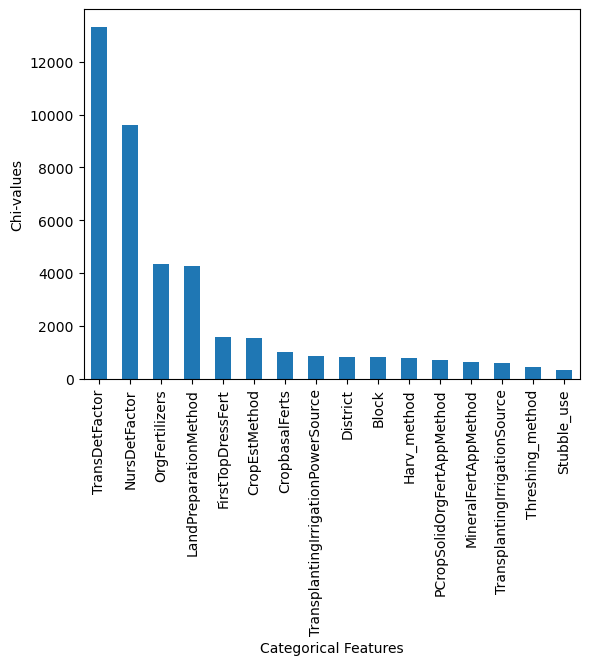

In [158]:
## Display the barplot of the chi_values of the categorical features
chi_values = pd.Series(chi_score[0],index=X_cat_data.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot(kind="bar",xlabel="Categorical Features",ylabel="Chi-values");

In [156]:
X_cat_data.columns

Index(['District', 'Block', 'LandPreparationMethod', 'CropEstMethod',
       'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'Harv_method', 'Threshing_method', 'Stubble_use'],
      dtype='object')

In [157]:
col=['District', 'Block', 'CropEstMethod',
 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'OrgFertilizers',
       'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod',
       'FirstTopDressFert', 'MineralFertAppMethod.1', 'Harv_method',
       'Threshing_method', 'Stubble_use']


### Observation
* The stubble use is the least importance categorical features for the  target variable. <br>
* The higher the score the higher the importance of the feature to the target variable. <br>
* Therefore we can drop the mrg columns from both the training and testing dataset

In [159]:
### Drop the mrg column from both the training and testing dataset
X_train = X_train.drop(columns='Stubble_use', axis=1)
X_val = X_val.drop(columns='Stubble_use', axis=1)
test_data =test_data.drop(columns='Stubble_use', axis=1)

In [161]:
X_train.shape , X_val.shape

((2902, 31), (968, 31))

In [162]:
test_data.shape

(1290, 32)

### Normalize/standardize the data

In [163]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Cleaning the testing dataset

In [164]:
test_data.head()

ID  District   Block  CultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira    20.000   
1  ID_SO3VW2X4QO93     Jamui  Khaira    25.000   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir    30.000   
3  ID_QUISMWEZR2H4  Vaishali   Mahua    15.000   
4  ID_25JGI455VKCZ   Nalanda  Rajgir    30.000   

                               LandPreparationMethod  CropTillageDepth  \
0                                      TractorPlough             4.000   
1                                      TractorPlough             5.000   
2  WetTillagePuddling TractorPlough FourWheelTrac...             5.000   
3  WetTillagePuddling TractorPlough BullockPlough...             5.000   
4  WetTillagePuddling TractorPlough FourWheelTrac...             3.000   

          CropEstMethod  SeedlingsPerPit  \
0    Manual_PuddledLine            1.000   
1  Manual_PuddledRandom            4.000   
2  Manual_PuddledRandom            2.000   
3  Manual_PuddledRandom            2.000   
4  Manual_PuddledRandom            1.000   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         2.000                        Boring   
1                         2.000                         Canal   
2                         4.000                         Canal   
3                         2.000                        Boring   
4                         6.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel        200.000          2.000   
1                           Electric        300.000          3.000   
2                           Electric        300.000         10.000   
3                             Diesel        300.000          3.000   
4                           Electric        400.000          3.000   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            FYM                SoilApplied              3.000            DAP   
1        Ganaura                SoilApplied              3.000            DAP   
2        Ganaura               Broadcasting              2.000       DAP Urea   
3            FYM                SoilApplied              2.000            DAP   
4        Ganaura                SoilApplied              2.000       DAP Urea   

   BasalDAP MineralFertAppMethod FirstTopDressFert  1appDaysUrea Harv_method  \
0     6.000         Broadcasting              Urea        23.000        hand   
1     5.000         Broadcasting              Urea        23.000        hand   
2     9.000         Broadcasting              Urea        38.000        hand   
3    15.000          SoilApplied              Urea        30.000        hand   
4    20.000         Broadcasting              Urea        40.000     machine   

   Harv_hand_rent Threshing_method  Residue_length  Residue_perc  Acre  \
0         500.000             hand          22.000        10.000 0.273   
1         150.000          machine          28.000        10.000 0.227   
2        1200.000          machine          28.000        10.000 0.281   
3         300.000             hand          30.000        10.000 0.136   
4         400.000          machine          26.000        40.000 0.312   

   growth_duration  nursery_duration  tillage_duration  
0          126.000            26.000             

In [165]:
### Cleaning the testing dataset
# Create a copy of the original dataset
data_test = test_data.copy()
## drop the ID columns in the testing data
data_test = data_test.drop(["ID"],axis=1)
# Now select the categorical columns in the testing dataset
categorical_test_column = data_test.select_dtypes("object").columns
# Now create the dummy variables on the categorical columns
for variable in categorical_test_column:
    
       data_test[variable] = pd.factorize(data_test[variable])[0]  

In [166]:
data_test.head()

District  Block  CultLand  LandPreparationMethod  CropTillageDepth  \
0         0      0    20.000                      0             4.000   
1         0      0    25.000                      0             5.000   
2         1      1    30.000                      1             5.000   
3         2      2    15.000                      2             5.000   
4         1      1    30.000                      1             3.000   

   CropEstMethod  SeedlingsPerPit  NursDetFactor  TransDetFactor  \
0              0            1.000              0               0   
1              1            4.000              1               1   
2              1            2.000              2               2   
3              1            2.000              3               3   
4              1            1.000              4               4   

   TransplantingIrrigationHours  TransplantingIrrigationSource  \
0                         2.000                              0   
1                         2.000                              1   
2                         4.000                              1   
3                         2.000                              0   
4                         6.000                              0   

   TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                                   0        200.000          2.000   
1                                   1        300.000          3.000   
2                                   1        300.000         10.000   
3                                   0        300.000          3.000   
4                                   1        400.000          3.000   

   OrgFertilizers  PCropSolidOrgFertAppMethod  NoFertilizerAppln  \
0               0                           0              3.000   
1               1                           0              3.000   
2               1                           1              2.000   
3               0                           0              2.000   
4               1                           0              2.000   

   CropbasalFerts  BasalDAP  MineralFertAppMethod  FirstTopDressFert  \
0               0     6.000                     0                  0   
1               0     5.000                     0                  0   
2               1     9.000                     0                  0   
3               0    15.000                     1                  0   
4               1    20.000                     0                  0   

   1appDaysUrea  Harv_method  Harv_hand_rent  Threshing_method  \
0        23.000            0         500.000                 0   
1        23.000            0         150.000                 1   
2        38.000            0        1200.000                 1   
3        30.000            0         300.000                 0   
4        40.000            1         400.000                 1   

   Residue_length  Residue_perc  Acre  growth_duration  nursery_duration  \
0          22.000        10.000 0.273          126.000            26.000   
1          28.000        10.000 0.227          102.000            25.000   
2          28.000        10.000 0.281          139.000            14.000   
3          30.000        10.000 0.136           97.000            20.000   
4          26.000        40.000 0.312          121.000            28.000   

   tillage_duration  
0             5.000  
1             9.000  
2             1.000  
3             6.000  
4             1.000

In [167]:
data_test.shape

(1290, 31)

In [168]:
X_test = data_test

In [169]:
### Now normalize the testing dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

### Model Building

## Performance measures description:

In [170]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
        r2 =r2_score(target,pred)
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae,"R2 Score":r2},index=[0],)

        return df_perf

In [171]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [172]:
# Lets load the training and testing data using lightgbm tools
dtrain = lgb.Dataset(X_train,label=y_train)
dvalid = lgb.Dataset(X_val,label=y_val)

In [173]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'regression' , 'metric':'rmse',
             'is_unbalance':'false', 'boosting':'gbdt','max_depth':7,'min_data_in_leaf':120,
             'num_leaves':127, 'feature_fraction': 0.5,'min_sum_hessian_in_leaf':100,'num_threads':16,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.0001 ,'verbose': -1    
}

In [174]:
callbacks=[lgb.early_stopping(stopping_rounds=1000)]

In [175]:
lgb_model = lgb.train(parameter,dtrain,valid_sets=dvalid,num_boost_round=1200)

In [178]:
## Check the performamce for each model in the training data of the imbalanced data 
lgb_train_perf = model_performance_regression_sklearn(lgb_model,X_train,y_train)

In [179]:
## Check the performamce for each model in the imbalanced validation data
lgb_val_perf = model_performance_regression_sklearn(lgb_model,X_val,y_val)

In [180]:
# Code to concatenate the training and validation performance
lgb_perf = pd.concat([lgb_train_perf.T,lgb_val_perf.T],axis=1)
lgb_perf.columns =["Training","Validation"]

In [181]:
print("Peformance measures on the original data")
lgb_perf

Peformance measures on the original data


Training  Validation
Root Mean Squared error    507.859     901.392
Mean Squared error      257920.438  812508.224
Mean Absolute error        307.514     351.637
R2 Score                     0.095       0.034

In [182]:
cv_results = lgb.cv(parameter, dtrain, num_boost_round = 5000, nfold=3,callbacks=[lgb.early_stopping(stopping_rounds=2000)],
                    seed = 50, stratified=False)

Training until validation scores don't improve for 2000 rounds
Did not meet early stopping. Best iteration is:
[5000]	cv_agg's valid rmse: 458.402 + 22.5474


In [183]:
cv_results['valid rmse-mean'][-1]   # code to display the last mean rmse

458.4022117485345

In [184]:
cv1=pd.DataFrame(cv_results).head()


In [185]:
cv1.columns

Index(['valid rmse-mean', 'valid rmse-stdv'], dtype='object')

In [186]:
cv1.head()

valid rmse-mean  valid rmse-stdv
0          533.628           19.808
1          533.602           19.809
2          533.587           19.809
3          533.561           19.810
4          533.545           19.809

In [187]:
print(f"The current parameters:{parameter}")
print(f"Best Number of Rounds:{len(cv_results['valid rmse-mean'])}")
print(f"Best Score:{ (cv_results['valid rmse-mean'][-1])}")

The current parameters:{'objective': 'regression', 'metric': 'rmse', 'is_unbalance': 'false', 'boosting': 'gbdt', 'max_depth': 7, 'min_data_in_leaf': 120, 'num_leaves': 127, 'feature_fraction': 0.5, 'min_sum_hessian_in_leaf': 100, 'num_threads': 16, 'bagging_fraction': 0.5, 'bagging_freq': 20, 'learning_rate': 0.0001, 'verbose': -1}
Best Number of Rounds:5000
Best Score:458.4022117485345


In [188]:
### Now lets first specify the lightgbm parameters a dictionary
parameters = { 'objective':'regression' , 'metric':'rmse',
             'is_unbalance':'false', 'boosting':'gbdt','max_depth':7,'min_data_in_leaf':120,
             'num_threads':16,'min_sum_hessian_in_leaf':100,
             'num_leaves':127, 'feature_fraction': 0.7,'min_sum_hessian_in_leaf':100,
             'bagging_fraction':0.7,'bagging_freq':24,
             'learning_rate':0.001,'verbose': -1    
}

In [189]:
lgb_model2 = lgb.train(parameters,dtrain,valid_sets=dvalid,num_boost_round=5000,
                      callbacks=[lgb.early_stopping(stopping_rounds=200)])

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[4905]	valid_0's rmse: 768.1


In [190]:
## Check the performamce for each model in the training data of the imbalanced data 
lgb_train_perf_over = model_performance_regression_sklearn(lgb_model2,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
lgb_val_perf_over= model_performance_regression_sklearn(lgb_model2,X_val,y_val)

In [191]:
lgb_perf_over = pd.concat([lgb_train_perf_over.T,lgb_val_perf_over.T],axis=1)
lgb_perf_over.columns =["Training","Validation"]

In [192]:
print("Peformance measures on the original data")
lgb_perf_over

Peformance measures on the original data


Training  Validation
Root Mean Squared error    326.352     768.100
Mean Squared error      106505.655  589976.939
Mean Absolute error        106.801     170.189
R2 Score                     0.626       0.298

## LGB Regressor Hyperparametric Tuning using randomisedsearchCV

In [193]:
parameter = { 'objective':'regression' , 'metric':'rmse',
             'is_unbalance':'false', 'boosting':'gbdt','max_depth':7,'min_data_in_leaf':120,
             'num_leaves':127, 'feature_fraction': 0.5,'min_sum_hessian_in_leaf':100,'num_threads':16,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.01 ,'verbose': -1    
}

In [ ]:
from lgb import LGBRegressor

In [201]:
### defining modelms
lgb_tuned = lgb.LGBMRegressor(objective="regression",eval_metric='rmse',boosting_type="gbdt",force_col_wise=True)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth':list((range(3,12))),
    'learning_rate':np.linspace(0.05,0.1,10),
    'n_estimators':list((range(35,51))),
    'colsample_bytree':[0.3,0.4,0.5,0.7,1], 
    'gamma':[0.1,0.2,0.3,0.4],
    'reg_alpha':[0,0.001,0.01,0.1],
    'subsample':[0.25,0.5,0.75,1], 
                     }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=lgb_tuned, param_distributions=param_grid,n_iter=3,
                                   cv=5,verbose=2,random_state=123)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
### Print the best parameters and highest accuracy
print("Best parameters found",randomized_cv.best_params_)
print("Best accuracy found",randomized_cv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 2321, number of used features: 31
[LightGBM] [Info] Start training from score 575.795347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [202]:
# Set the clf to the best combination of parameters and fit the tuned model
xg_boost_tuned=randomized_cv.best_estimator_
xg_boost_tuned.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 2902, number of used features: 31
[LightGBM] [Info] Start training from score 576.528601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

LGBMRegressor(colsample_bytree=0.5, eval_metric='rmse', force_col_wise=True,
              gamma=0.3, learning_rate=0.09444444444444444, max_depth=4,
              n_estimators=50, objective='regression', reg_alpha=0.1,
              subsample=0.75)

In [204]:
## Code to check the performance on the training set
xg_train_perf_tuned =model_performance_regression_sklearn(xg_boost_tuned , X_train, y_train) 
## Code to check the performance on validation
xg_val_perf_tuned = model_performance_regression_sklearn(xg_boost_tuned , X_val, y_val) 

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma


In [205]:
xg_perf_over_tuned = pd.concat([xg_train_perf_tuned.T,xg_val_perf_tuned.T],axis=1)
xg_perf_over_tuned.columns =["Training","Validation"]

In [206]:
print("Performance measures on tuned xgboost model on the over-sampled data")
xg_perf_over_tuned

Performance measures on tuned xgboost model on the over-sampled data


Training  Validation
Root Mean Squared error   285.191     763.487
Mean Squared error      81333.634  582912.335
Mean Absolute error       102.792     170.362
R2 Score                    0.715       0.307

In [207]:
test_data.head()

ID  District   Block  CultLand  \
0  ID_F9XXEXN2ADR2     Jamui  Khaira    20.000   
1  ID_SO3VW2X4QO93     Jamui  Khaira    25.000   
2  ID_UKUQ7JM8E894   Nalanda  Rajgir    30.000   
3  ID_QUISMWEZR2H4  Vaishali   Mahua    15.000   
4  ID_25JGI455VKCZ   Nalanda  Rajgir    30.000   

                               LandPreparationMethod  CropTillageDepth  \
0                                      TractorPlough             4.000   
1                                      TractorPlough             5.000   
2  WetTillagePuddling TractorPlough FourWheelTrac...             5.000   
3  WetTillagePuddling TractorPlough BullockPlough...             5.000   
4  WetTillagePuddling TractorPlough FourWheelTrac...             3.000   

          CropEstMethod  SeedlingsPerPit  \
0    Manual_PuddledLine            1.000   
1  Manual_PuddledRandom            4.000   
2  Manual_PuddledRandom            2.000   
3  Manual_PuddledRandom            2.000   
4  Manual_PuddledRandom            1.000   

                                       NursDetFactor  \
0  LabourAvailability IrrigWaterAvailability PreM...   
1  CalendarDate SeedAvailability IrrigWaterAvaila...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate IrrigWaterAvailability LabourAvai...   
4            SeedAvailability IrrigWaterAvailability   

                                      TransDetFactor  \
0  IrrigWaterAvailability LaborAvailability RainA...   
1  CalendarDate SeedlingAge IrrigWaterAvailabilit...   
2  SeedlingAge RainArrival IrrigWaterAvailability...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge IrrigWaterAvailability LaborAvaila...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                         2.000                        Boring   
1                         2.000                         Canal   
2                         4.000                         Canal   
3                         2.000                        Boring   
4                         6.000                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                             Diesel        200.000          2.000   
1                           Electric        300.000          3.000   
2                           Electric        300.000         10.000   
3                             Diesel        300.000          3.000   
4                           Electric        400.000          3.000   

  OrgFertilizers PCropSolidOrgFertAppMethod  NoFertilizerAppln CropbasalFerts  \
0            FYM                SoilApplied              3.000            DAP   
1        Ganaura                SoilApplied              3.000            DAP   
2        Ganaura               Broadcasting              2.000       DAP Urea   
3            FYM                SoilApplied              2.000            DAP   
4        Ganaura                SoilApplied              2.000       DAP Urea   

   BasalDAP MineralFertAppMethod FirstTopDressFert  1appDaysUrea Harv_method  \
0     6.000         Broadcasting              Urea        23.000        hand   
1     5.000         Broadcasting              Urea        23.000        hand   
2     9.000         Broadcasting              Urea        38.000        hand   
3    15.000          SoilApplied              Urea        30.000        hand   
4    20.000         Broadcasting              Urea        40.000     machine   

   Harv_hand_rent Threshing_method  Residue_length  Residue_perc  Acre  \
0         500.000             hand          22.000        10.000 0.273   
1         150.000          machine          28.000        10.000 0.227   
2        1200.000          machine          28.000        10.000 0.281   
3         300.000             hand          30.000        10.000 0.136   
4         400.000          machine          26.000        40.000 0.312   

   growth_duration  nursery_duration  tillage_duration  
0          126.000            26.000             

In [208]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data["Yield"] = lgb_model.predict(X_test)

In [210]:
# Lets create a dataframe to display the ID and Yield columns
data_df =pd.DataFrame({"ID":test_data["ID"],"Yield":test_data["Yield"]})

In [211]:
data_df.head()

ID   Yield
0  ID_F9XXEXN2ADR2 564.021
1  ID_SO3VW2X4QO93 559.204
2  ID_UKUQ7JM8E894 578.053
3  ID_QUISMWEZR2H4 549.610
4  ID_25JGI455VKCZ 587.344

In [212]:
data_df.tail()

ID   Yield
1285  ID_6MMECMX3B728 603.662
1286  ID_GZ9YGWCLLMKN 564.307
1287  ID_01YVA2LJVYBR 544.409
1288  ID_YQRL2IOUU4SZ 559.521
1289  ID_VAX2N8ELPEZE 546.844

In [213]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(Digital_green_results).csv",index=False) 